# A1: Predicting Car Price

In this assignment, We need to predict the **selling price for a car** . Finally we also need to prepare a simple web-based car selling price prediction system for deployment.

## The provide raw data contains following features- 

- **name** : Brand name of the Car
- **Year** : Year of the car made
- **selling_price**: Selling price of the car
- **km_driven**: How many Killometers A car already run
- **fuel**: Type of fuel is used in car
- **seller_type**: Type of seller (Invididual, Dealer etc)
- **transmission**: Type of transmission of car ( Manual, Automatic)
- **owner**: How many owner already did purchase of a car
- **mileage**: Mileage of the car
- **engine**: Engine size
- **max_power**: The max power is available to a car
- **torque**:if an engine has a lot of torque, the car can accelerate more quickly.
- **seats**: Number of seats are availabe to a car

This raw dataset is required to be processed on given preporessing conditions


## Importing libraries

In [111]:
#loading the required libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot_lib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

In [112]:
sklearn.__version__

'1.3.2'

## 1. Load data

In [3]:
# Use pd.read_csv function to show our Dataset and load it into a dataframe 'data_frame'
data_frame = pd.read_csv('data/Cars.csv')

# Check for missing values in the data
data_frame.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
# head() function to display the first few rows of a DataFrame. 
data_frame.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [5]:
# Get the dimensions of the DataFrame 'data_frame' using the shape attribute
data_frame.shape

(8128, 13)

It returns a tuple representing the number of rows and columns which means the dataset has 8128 rows and 13 columns


In [6]:
# Descriptive statistics of the DataFrame using the describe() function
data_frame.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [7]:
# .info() function to display information about the DataFrame, including data types and memory usage
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Get the unique values and the number of unique value in the 'owner' column of the DataFrame
u1 = data_frame['owner'].unique()

u2 = data_frame['owner'].nunique()
print(u1 , u2)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] 5


In [9]:
# For the feature owner, map First owner to 1, ..., Test Drive Car to 5
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
# We will use .map() function  transform values in the owner column
data_frame["owner"] = data_frame["owner"].map(dict_owner)
data_frame.head(20)

name  year  selling_price  km_driven  \
0                 Maruti Swift Dzire VDI  2014         450000     145500   
1           Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2               Honda City 2017-2020 EXi  2006         158000     140000   
3              Hyundai i20 Sportz Diesel  2010         225000     127000   
4                 Maruti Swift VXI BSIII  2007         130000     120000   
5          Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6           Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                     Maruti 800 DX BSII  2001          45000       5000   
8                       Toyota Etios VXD  2011         350000      90000   
9   Ford Figo Diesel Celebration Edition  2013         200000     169000   
10       Renault Duster 110PS Diesel RxL  2014         500000      68000   
11                         Maruti Zen LX  2005          92000     100000   
12                Maruti Swift Dzire VDi  2009         280000     140000   
13                  Maruti Swift 1.3 VXi  2007         200000      80000   
14              Maruti Wagon R LXI Minor  2009         180000      90000   
15  Mahindra KUV 100 mFALCON G80 K8 5str  2016         400000      40000   
16                Maruti Ertiga SHVS VDI  2016         778000      70000   
17             Hyundai i20 1.4 CRDi Asta  2012         500000      53000   
18                        Maruti Alto LX  2002         150000      80000   
19   Hyundai i20 2015-2017 Asta 1.4 CRDi  2016         680000     100000   

      fuel seller_type transmission  owner     mileage   engine   max_power  \
0   Diesel  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1   Diesel  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2   Petrol  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3   Diesel  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4   Petrol  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   
5   Petrol  Individual       Manual      1  20.14 kmpl  1197 CC   81.86 bhp   
6      LPG  Individual       Manual      1  17.3 km/kg  1061 CC    57.5 bhp   
7   Petrol  Individual       Manual      2   16.1 kmpl   796 CC      37 bhp   
8   Diesel  Individual       Manual      1  23.59 kmpl  1364 CC    67.1 bhp   
9   Diesel  Individual       Manual      1   20.0 kmpl  1399 CC    68.1 bhp   
10  Diesel  Individual       Manual      2  19.01 kmpl  1461 CC  108.45 bhp   
11  Petrol  Individual       Manual      2   17.3 kmpl   993 CC      60 bhp   
12  Diesel  Individual       Manual      2   19.3 kmpl  1248 CC    73.9 bhp   
13  Petrol  Individual       Manual      2         NaN      NaN         NaN   
14  Petrol  Individual       Manual      2   18.9 kmpl  1061 CC      67 bhp   
15  Petrol  Individual       Manual      1  18.15 kmpl  1198 CC      82 bhp   
16  Diesel  Individual       Manual      2  24.52 kmpl  1248 CC    88.5 bhp   
17  Diesel  Individual       Manual      2   23.0 kmpl  1396 CC      90 bhp   
18  Petrol  Individual       Manual      2   19.7 kmpl   796 CC    46.3 bhp   
19  Diesel  Individual       Manual      1  22.54 kmpl  1396 CC   88.73 bhp   

                      torque  seats  
0             190Nm@ 2000rpm    5.0  
1        250Nm@ 1500-2500rpm    5.0  
2      12.7@ 2,700(kgm@ rpm)    5.0  
3   22.4 kgm at 1750-2750rpm    5.0  
4      11.5@ 4,500(kgm@ rpm)    5.0  
5          113.75nm@ 4000rpm    5.0  
6       7.8@ 4,500(kgm@ rpm)    5.0  
7              59Nm@ 2500rpm    4.0  
8        170Nm@ 1800-2400rpm    5.0  
9             160Nm@ 2000rpm    5.0  
10            248Nm@ 2250rpm    5.0  
11             78Nm@ 4500rpm    5.0  
12            190Nm@ 2000rpm    5.0  
13                       NaN    NaN  
14             84Nm@ 3500rpm    5.0  
15       115Nm@ 3500-3600rpm    5.0  
16            200Nm@ 1750rpm    7.0  
17  22.4 kgm at 1750-2750rpm    5.0  
18             62Nm@ 3000rpm    5.0  
19     219.7Nm@ 150

In [10]:
# Unique values in the 'fuel' column of the 'data_frame'
data_frame['fuel'].unique(), data_frame.shape

(array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object), (8128, 13))

In [11]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
data_frame = data_frame.drop(data_frame[data_frame['fuel'].isin(['CNG', 'LPG'])].index)


In [12]:
# Verify if the CNG And LPG got removed
data_frame['fuel'].unique(), data_frame.shape

(array(['Diesel', 'Petrol'], dtype=object), (8033, 13))

In [13]:
# Drop feature torque since Chaky's company cannot understand it.
data_frame.drop(['torque'], axis = 1, inplace = True)

# For the feature brand, take only the first word and remove the rest
# Use str.split() function
data_frame["brand"] = data_frame["name"].str.split(" ").str[0]
data_frame.drop(["name"], axis=1, inplace=True)

# Split features of mileage, engine and max power into value and unit
data_frame[["mileage_value","mileage_unit"]] = data_frame["mileage"].str.split(pat=' ', expand = True)
data_frame[["engine_value","engine_unit"]] = data_frame["engine"].str.split(pat=' ', expand = True)
data_frame[["max_power_value","max_power_unit"]] = data_frame["max_power"].str.split(pat=' ', expand = True)
data_frame.drop(["mileage","engine","max_power"], axis=1, inplace=True)
data_frame.head(20)

# We will convert the values of mileage, engine and max_power into float
data_frame[["mileage","engine","max_power"]] = data_frame[["mileage_value","engine_value","max_power_value"]].astype('float64')
data_frame.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# Arrange the columns
data_frame = data_frame.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

data_frame

brand  year  selling_price  km_driven    fuel seller_type  \
0      Maruti  2014         450000     145500  Diesel  Individual   
1       Skoda  2014         370000     120000  Diesel  Individual   
2       Honda  2006         158000     140000  Petrol  Individual   
3     Hyundai  2010         225000     127000  Diesel  Individual   
4      Maruti  2007         130000     120000  Petrol  Individual   
...       ...   ...            ...        ...     ...         ...   
8123  Hyundai  2013         320000     110000  Petrol  Individual   
8124  Hyundai  2007         135000     119000  Diesel  Individual   
8125   Maruti  2009         382000     120000  Diesel  Individual   
8126     Tata  2013         290000      25000  Diesel  Individual   
8127     Tata  2013         290000      25000  Diesel  Individual   

     transmission  owner  mileage  engine  max_power  seats  
0          Manual      1    23.40  1248.0      74.00    5.0  
1          Manual      2    21.14  1498.0     103.52    5.0  
2          Manual      3    17.70  1497.0      78.00    5.0  
3          Manual      1    23.00  1396.0      90.00    5.0  
4          Manual      1    16.10  1298.0      88.20    5.0  
...           ...    ...      ...     ...        ...    ...  
8123       Manual      1    18.50  1197.0      82.85    5.0  
8124       Manual      4    16.80  1493.0     110.00    5.0  
8125       Manual      1    19.30  1248.0      73.90    5.0  
8126       Manual      1    23.57  1396.0      70.00    5.0  
8127       Manual      1    23.57  1396.0      70.00    5.0  

[8033 rows x 12 columns]

In [14]:
#  Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
data_frame = data_frame.drop(data_frame[data_frame['owner'].isin([5])].index)

In [15]:
# Check categories of brand, fuel, seller type and owner
print("categories of brand are", data_frame["brand"].unique())
print("categories of fuel are", data_frame["fuel"].unique())
print("categories of seller_type are", data_frame["seller_type"].unique())
print("categories of owner are", data_frame["owner"].unique())

categories of brand are ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
categories of fuel are ['Diesel' 'Petrol']
categories of seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
categories of owner are [1 2 3 4]


__Now Our data looks like that it satisies all the given requirements__

In [16]:
data_frame.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [17]:
# Apply log transform to the 'selling_price' column
data_frame['selling_price'] = np.log(data_frame['selling_price']) 

In [18]:
data_frame.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014      13.017003     145500  Diesel  Individual       Manual   
1    Skoda  2014      12.821258     120000  Diesel  Individual       Manual   
2    Honda  2006      11.970350     140000  Petrol  Individual       Manual   
3  Hyundai  2010      12.323856     127000  Diesel  Individual       Manual   
4   Maruti  2007      11.775290     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [19]:
# Copy the data_frame for further data processing & feature transformation
data_frame_cp = data_frame.copy()

In [20]:
data_frame_cp.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014      13.017003     145500  Diesel  Individual       Manual   
1    Skoda  2014      12.821258     120000  Diesel  Individual       Manual   
2    Honda  2006      11.970350     140000  Petrol  Individual       Manual   
3  Hyundai  2010      12.323856     127000  Diesel  Individual       Manual   
4   Maruti  2007      11.775290     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

## 2. EDA 

### EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [21]:
data_frame_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


### 2.1. Univariate analyis

Single variable exploratory data anlaysis

#### Categorical Variables Univariate Analysis

A **count plot** is a type of bar plot that is specifically used to visualize the frequency distribution of categorical data. It's particularly useful when we want to understand the distribution of categories within a single categorical variable. 

Text(0, 0.5, 'No. of Cars')

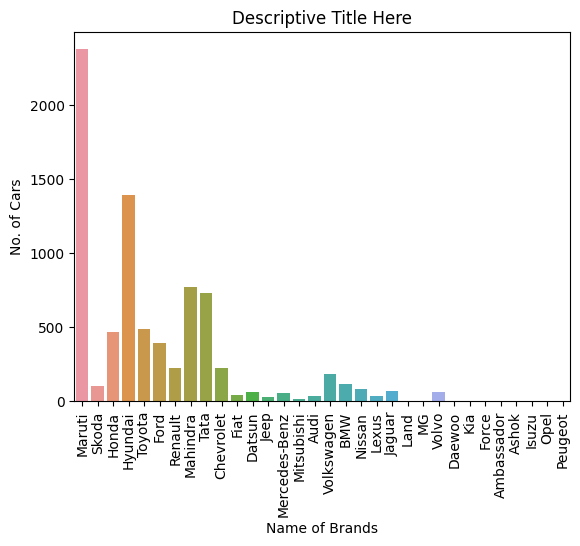

In [22]:
# Countplot to visualize the distribution of 'brand' column
sns.countplot(data = data_frame_cp, x ='brand')
# Rotate x-axis labels for better readability
plot_lib.xticks(rotation=90)
# Visualizing the data using matplotlib and seaborn
plot_lib.title('Descriptive Title Here')
plot_lib.xlabel('Name of Brands')
plot_lib.ylabel('No. of Cars')

In [23]:
data_frame_cp['brand'].nunique()

32

Since Car Brand contains 32 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it.

In [24]:
data_frame_cp.drop('brand', axis=1,inplace=True)

We're using the matplotlib and seaborn libraries to create subplots with countplots for other categorical column in the DataFrame df_cp. The loop iterates through the categorical columns, and for each column, a countplot is created. 

In [25]:
categorical_cols = ['fuel','seller_type', 'transmission']

Text(0.5, 0.98, 'Frequency')

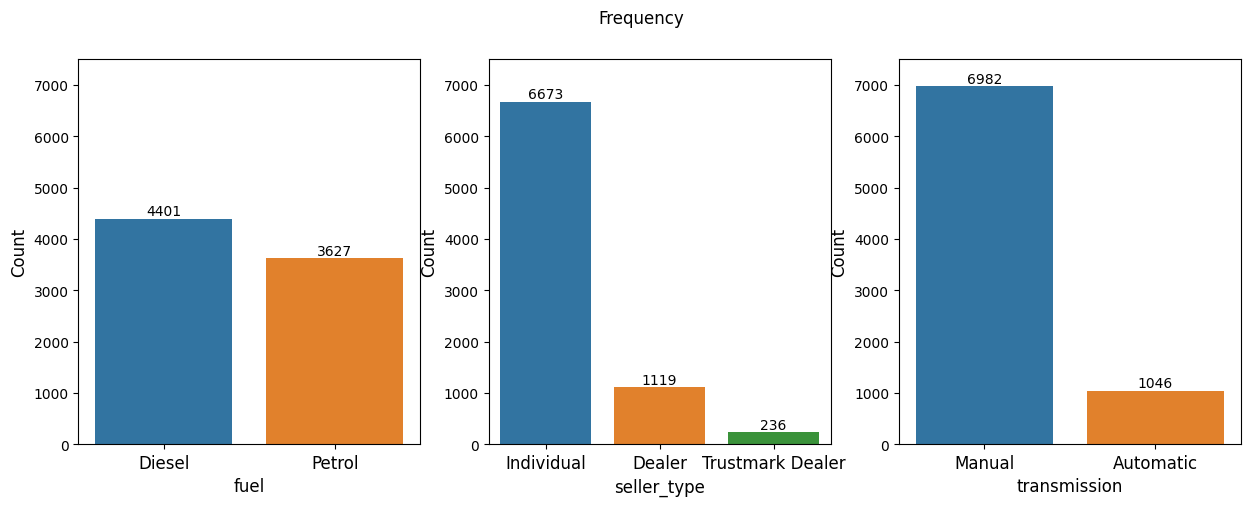

In [26]:
# Initialize a subplot layout with 1 row and 3 columns, and set the figure size and DPI
fig, ax = plot_lib.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)

# Loop through each categorical column to create individual plots
for i in range(len(categorical_cols)):
    # Create a countplot for each categorical column to visualize its distribution
    graph = sns.countplot(x=categorical_cols[i], data=data_frame_cp, ax=ax[i])
    
    # Customize the x and y labels, set the y-axis limit, and format the x-tick labels
    ax[i].set_xlabel(categorical_cols[i], fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0, 7500])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    
    # Annotate each bar with its count value for better clarity
    for cont in graph.containers:
        graph.bar_label(cont)

# Set a common title for the entire subplot layout
plot_lib.suptitle('Frequency')



- There are 2 fuel categories. Diesel has the highest frequency and Petrol has the least frequency.
- There are 3 seller_type categories. Individual has the highest frequency and Trustmark has the least frequency.
- There are 2 transmission categories. Manual has the highest frequency and Automatic has the least frequency.

### 2.2. Numerical Data Univariate Analysis

### Using a line plot to display trends, patterns, and changes in selling prices across different years


<Axes: xlabel='year', ylabel='selling_price'>

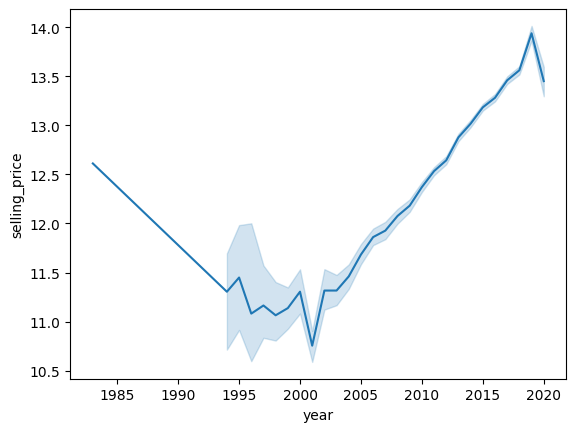

In [27]:
# Create a line plot to visualize the trend of selling prices over the years
sns.lineplot(x='year', y='selling_price', data=data_frame_cp, palette='tab20')

"The 'Year' column represents the model year of each car. We can substitute this with an 'age' attribute for the cars. To calculate each car's age, we'll use a reference point set at one year beyond the most recent model year in the data."

In [28]:
# Find the maximum model year in the dataset
max_year = data_frame_cp['year'].max()

# Calculate the age of each car. The origin is set at 1 year older than the latest model year.
data_frame_cp['age'] = (max_year + 1) - data_frame['year']

# remove the original 'year' column:
data_frame_cp.drop('year', axis=1, inplace=True)


In [29]:
# Define the numerical columns to visualize other than 'year'
numerical_cols = ['age', 'km_driven', 'owner','mileage','engine', 'seats','max_power', 'selling_price']

### Distribution plot

__Seaborn's displot function is utilized here for distribution analysis. It's ideal for univariate data visualization,providing a clear view of a single variable's distribution. This function offers various display options like histograms, kernel density estimates, etc., making it versatile for a wide range of analytical scenarios.



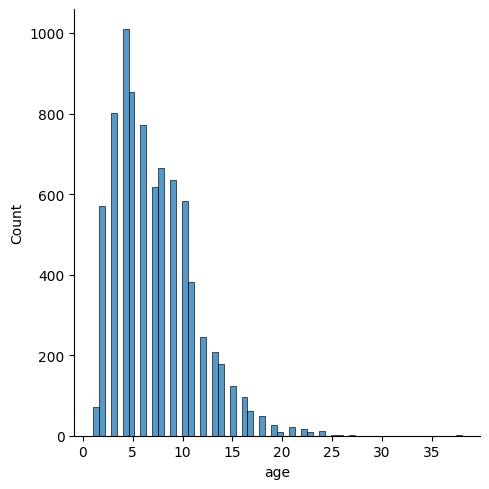

In [30]:
# Create a histogram using displot to visualize the distribution of the specified numerical column 'age'
sns.displot(data = data_frame_cp, x = numerical_cols[0])


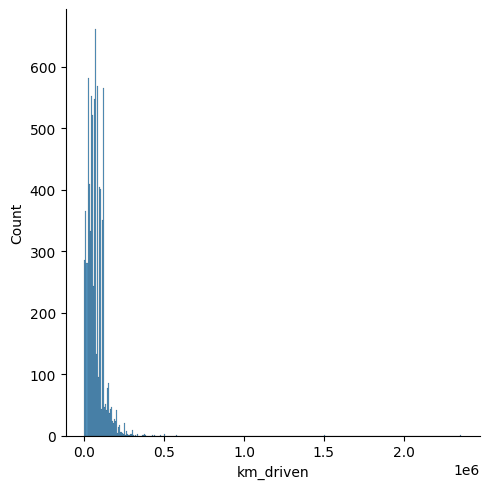

In [31]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'km_driven' column.
# This histogram will help in analyzing the range and frequency of kilometers driven across the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[1])


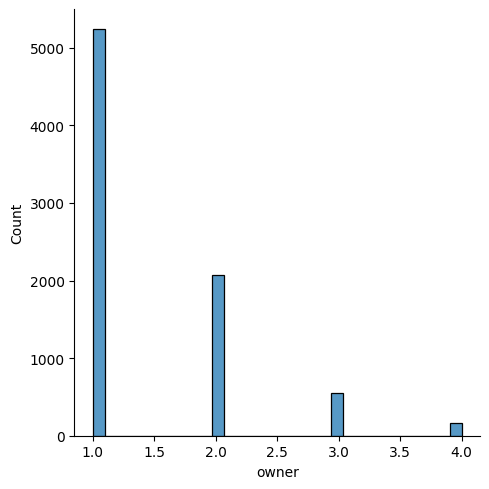

In [32]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'owner' column.
# This will provide insights into the frequency distribution of different ownership categories in the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[2])


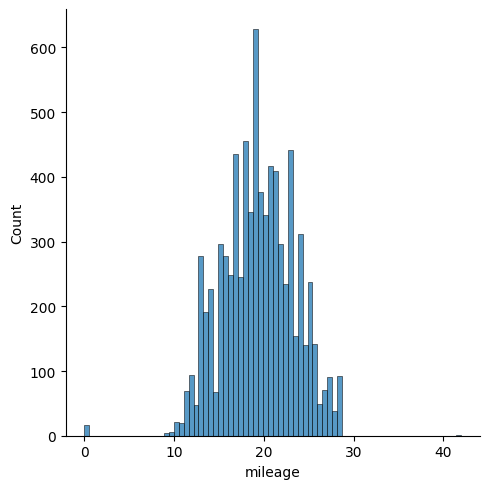

In [33]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'mileage' column.
# This histogram will help in understanding the range and frequency of mileage values across the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[3])


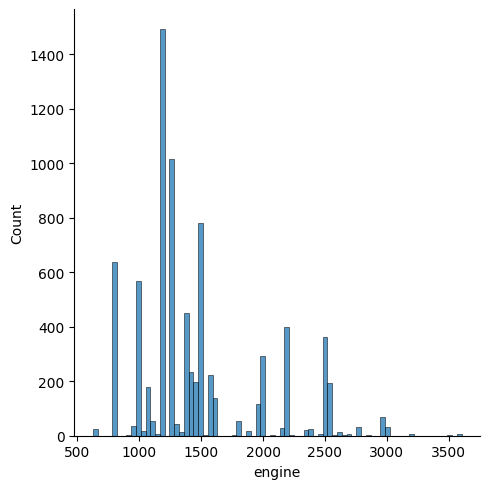

In [34]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'engine' column.
# This histogram is useful for analyzing the range and frequency of engine sizes in the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[4])


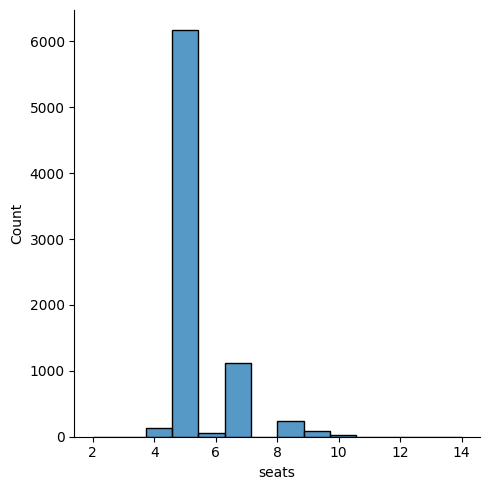

In [35]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'seats' column.
# This histogram will assist in understanding the frequency distribution of different seat configurations in vehicles.
sns.displot(data=data_frame_cp, x=numerical_cols[5])

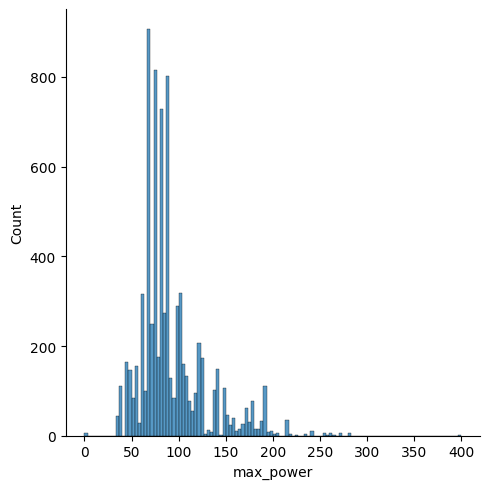

In [36]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'max_power' column.
# This histogram is useful for analyzing the range and frequency of maximum power values in the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[6])



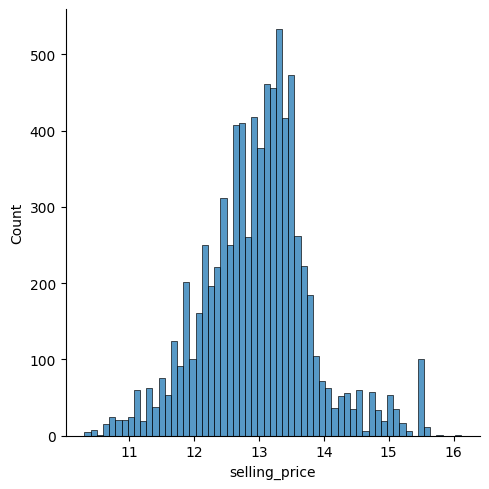

In [37]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'selling_price' column.
# This histogram will help in understanding the frequency and range of selling prices in the dataset.
sns.displot(data=data_frame_cp, x=numerical_cols[7])

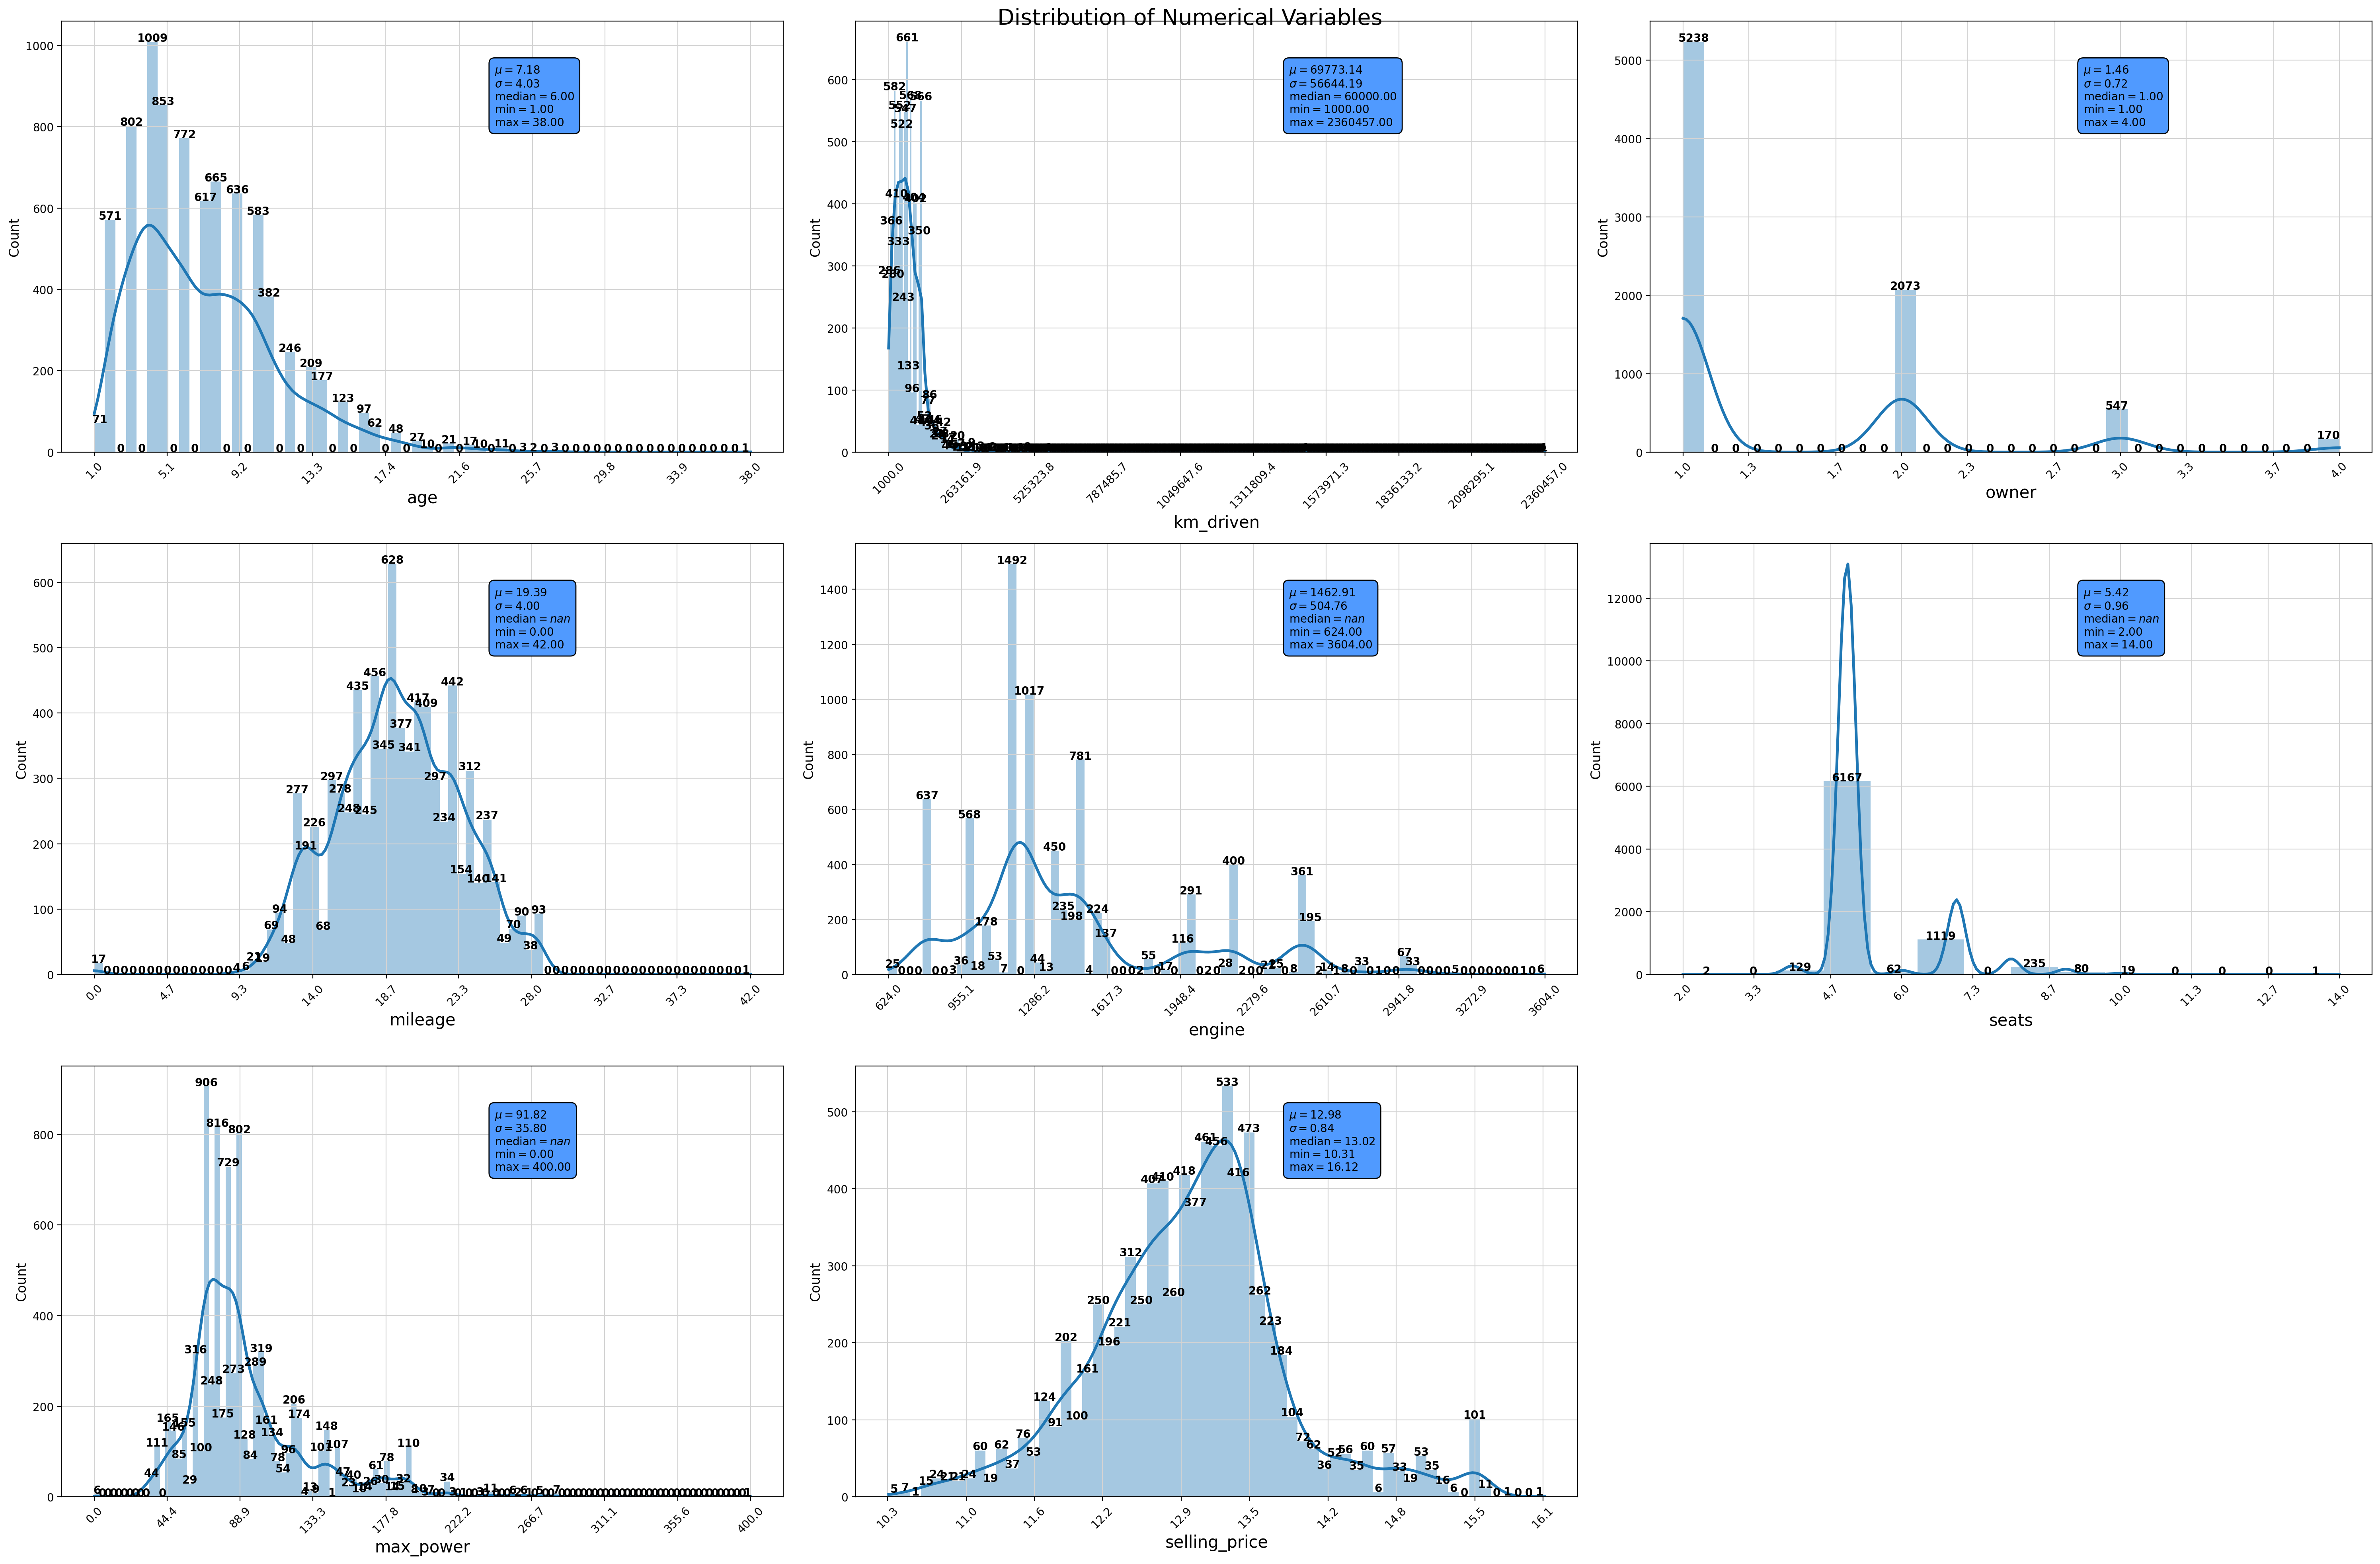

In [38]:
# Setting up subplots for each numerical variable in a 3x3 grid with customized size and DPI
fig, ax = plot_lib.subplots(nrows=3, ncols=3, figsize=(30, 20), dpi=200)

# Looping through each numerical column to create individual histograms
for i in range(len(numerical_cols)):
    # Calculating subplot positions based on the index
    row, col = i // 3, i % 3

    # Generating histogram with Kernel Density Estimation (KDE) for each numerical variable
    graph = sns.histplot(data=data_frame_cp, x=numerical_cols[i], kde=True, ax=ax[row, col],
                         edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})

    # Setting up labels, ticks, and grid for clarity in each subplot
    ax[row, col].set_xlabel(numerical_cols[i], fontsize=15)
    ax[row, col].set_ylabel('Count', fontsize=12)
    ax[row, col].set_xticks(np.round(np.linspace(data_frame_cp[numerical_cols[i]].min(), data_frame_cp[numerical_cols[i]].max(), 10), 1))
    ax[row, col].set_xticklabels(ax[row, col].get_xticks(), rotation=45)
    ax[row, col].grid(color='lightgrey')

    # Annotating each histogram bar with its count value for detailed insight
    for j, p in enumerate(graph.patches):
        ax[row, col].annotate('{}'.format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                              ha='center', fontsize=10, fontweight="bold")
    
    # Adding a text box with summary statistics for each variable
    textstr = '\n'.join((
        r'$\mu=%.2f$' % data_frame_cp[numerical_cols[i]].mean(),
        r'$\sigma=%.2f$' % data_frame_cp[numerical_cols[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(data_frame_cp[numerical_cols[i]]),
        r'$\mathrm{min}=%.2f$' % data_frame_cp[numerical_cols[i]].min(),
        r'$\mathrm{max}=%.2f$' % data_frame_cp[numerical_cols[i]].max()
    ))
    ax[row, col].text(0.6, 0.9, textstr, transform=ax[row, col].transAxes, fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='#509aff', edgecolor='black', pad=0.5))

# Hiding any unused subplot in the grid
ax[2, 2].axis('off')

# Finalizing the plot with a title, adjusting the layout, and displaying it
plot_lib.suptitle('Distribution of Numerical Variables', fontsize=20)
plot_lib.tight_layout()
plot_lib.show()


### 2.3. Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Box plots are great for comparing the distribution of a numeric variable across different categories 

- They display the median, quartiles, and possible outliers in a clear and compact manner.
- The x parameter specifies the categorical variable
- The y parameter specifies the numerical variable 

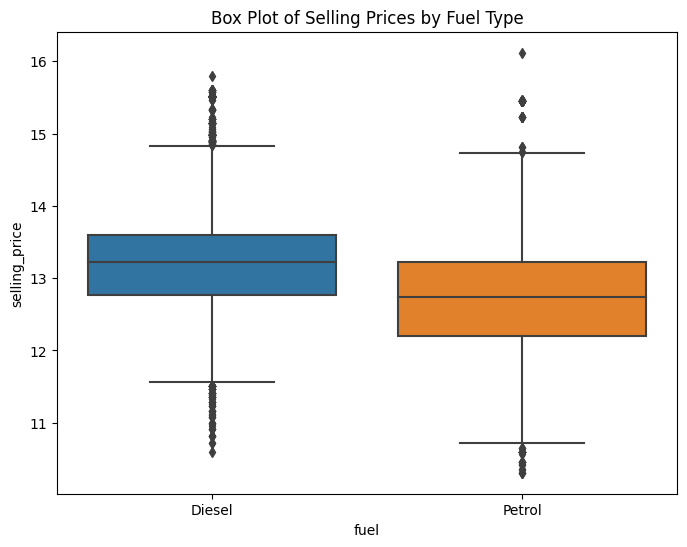

In [39]:
# Create a box plot to compare the distribution of selling prices across different fuel categories
plot_lib.figure(figsize=(8, 6))
sns.boxplot(data=data_frame_cp, x=categorical_cols[0], y=numerical_cols[-1])
plot_lib.title("Box Plot of Selling Prices by Fuel Type")
plot_lib.show()


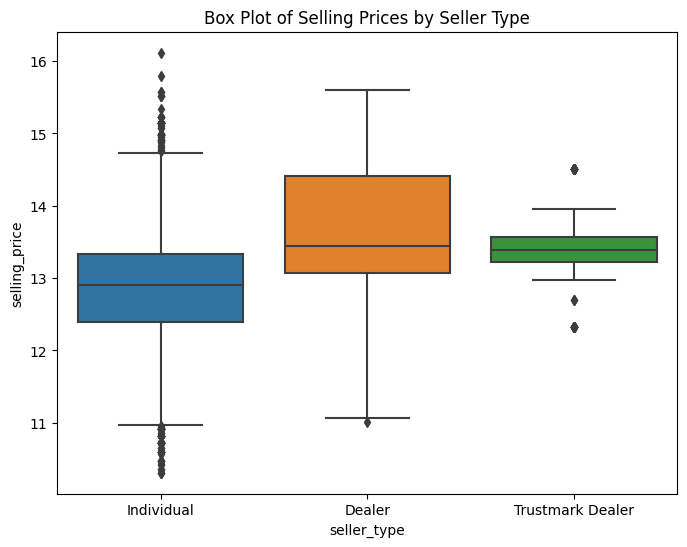

In [40]:
# Create a box plot to examine the distribution of selling prices among different seller types
plot_lib.figure(figsize=(8, 6))
sns.boxplot(data=data_frame_cp, x=categorical_cols[1], y=numerical_cols[-1])
plot_lib.title("Box Plot of Selling Prices by Seller Type")
plot_lib.show()


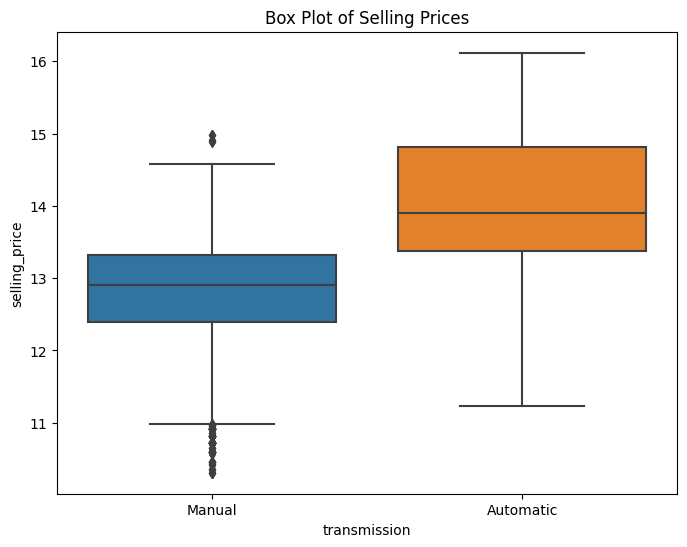

In [41]:
#  Create a box plot to visualize the distribution of selling price against transmission
plot_lib.figure(figsize=(8, 6))
sns.boxplot(data=data_frame_cp, x=categorical_cols[2], y=numerical_cols[-1])
plot_lib.title("Box Plot of Selling Prices")
plot_lib.show()
# Visualizing the data using matplotlib and seaborn

### Scatterplot

In [42]:
# Function to create scatter plots for each numerical feature against a target variable.
# Subplots are organized based on specified rows and columns. 
# For details on subplotting, visit: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
def do_scatterplot(numerical_feature, target, hue_label, nrows=3, ncols=3):
    # Setting up the layout for the subplots with the given rows, columns, size, and DPI
    fig, ax = plot_lib.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12), dpi=200)

    # Iterating through the numerical features to create individual scatter plots
    for i in range(len(numerical_feature)):
        x, y = i // 3, i % 3
        # Using Seaborn's scatterplot to visualize the relationship between each feature and the target
        sns.scatterplot(data=data_frame_cp, x=numerical_feature[i], y=target, hue=hue_label, ax=ax[x, y])

        # Customizing the title, axis labels, and grid for each subplot for better readability
        ax[x, y].set_title('{} vs. {}'.format(target, numerical_feature[i]), size=15)
        ax[x, y].set_xlabel(numerical_feature[i], size=12)
        ax[x, y].set_ylabel(target, size=12)
        ax[x, y].grid()

    # Hiding unused subplots in the grid
    ax[2, 1].axis('off')
    ax[2, 2].axis('off')

    # Adjusting the layout for a neat presentation and displaying the plots
    plot_lib.tight_layout()
    plot_lib.show()

# Note: This function is designed to visualize data using matplotlib and seaborn


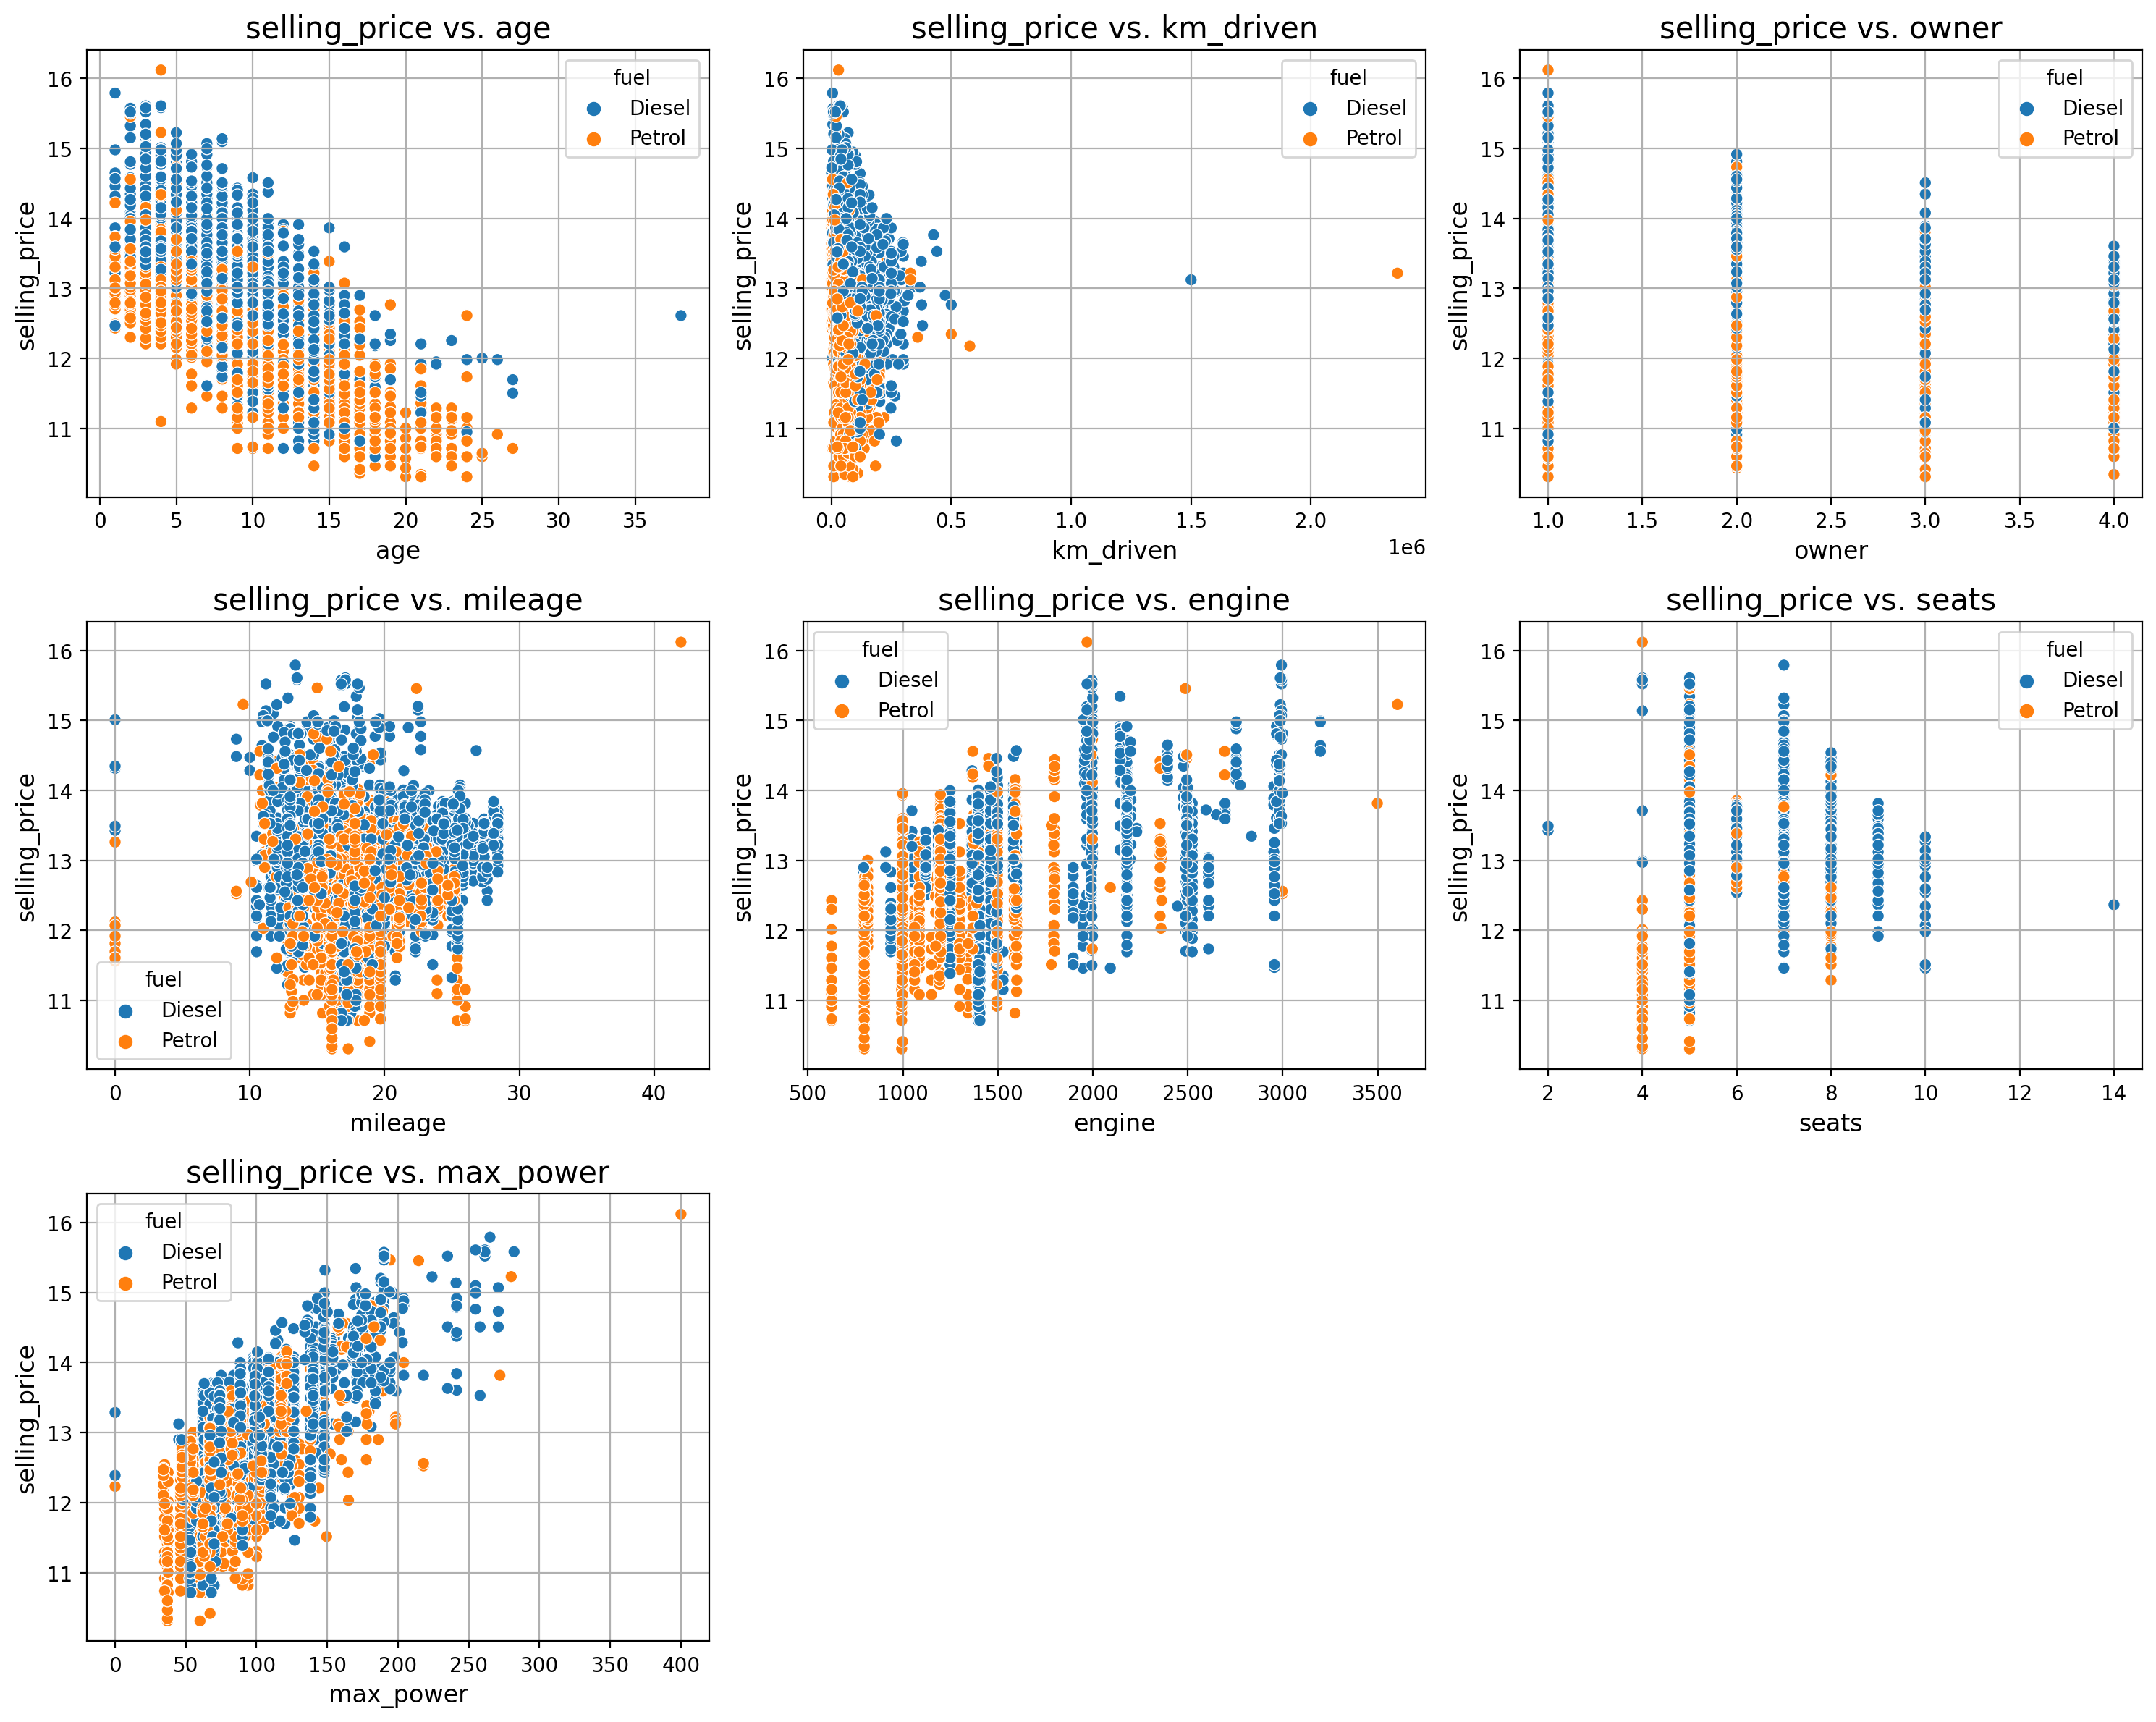

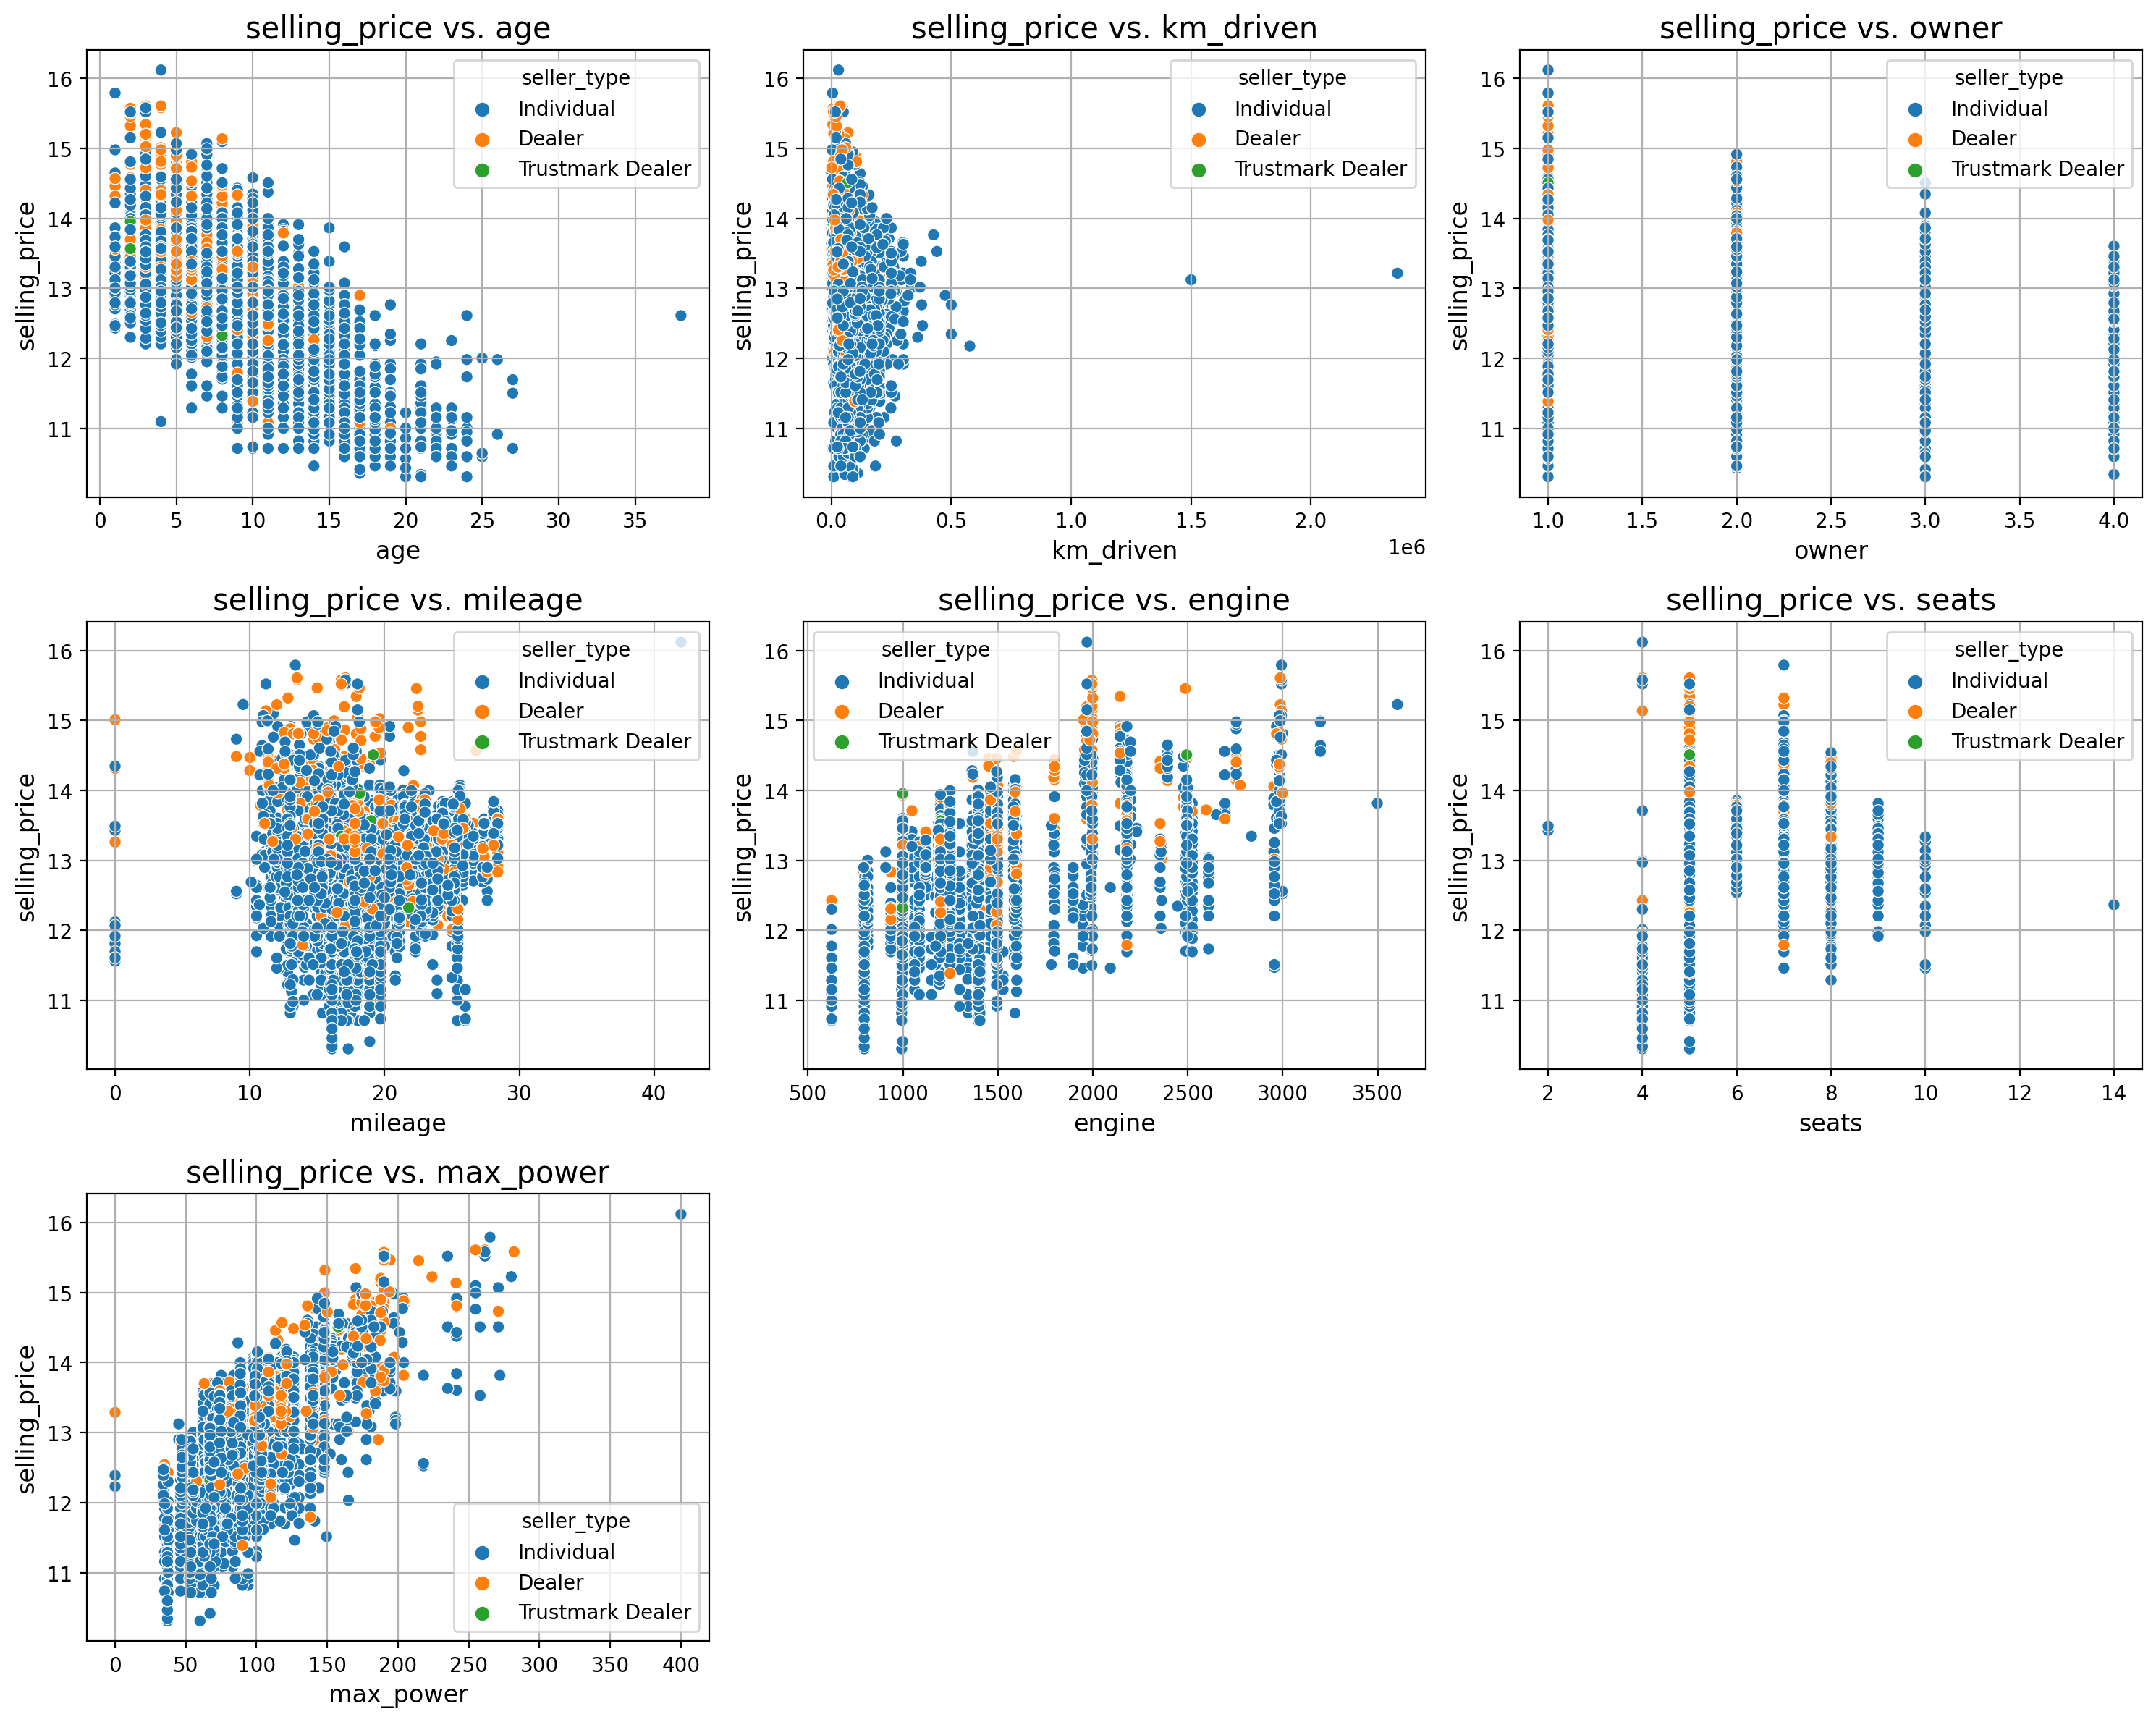

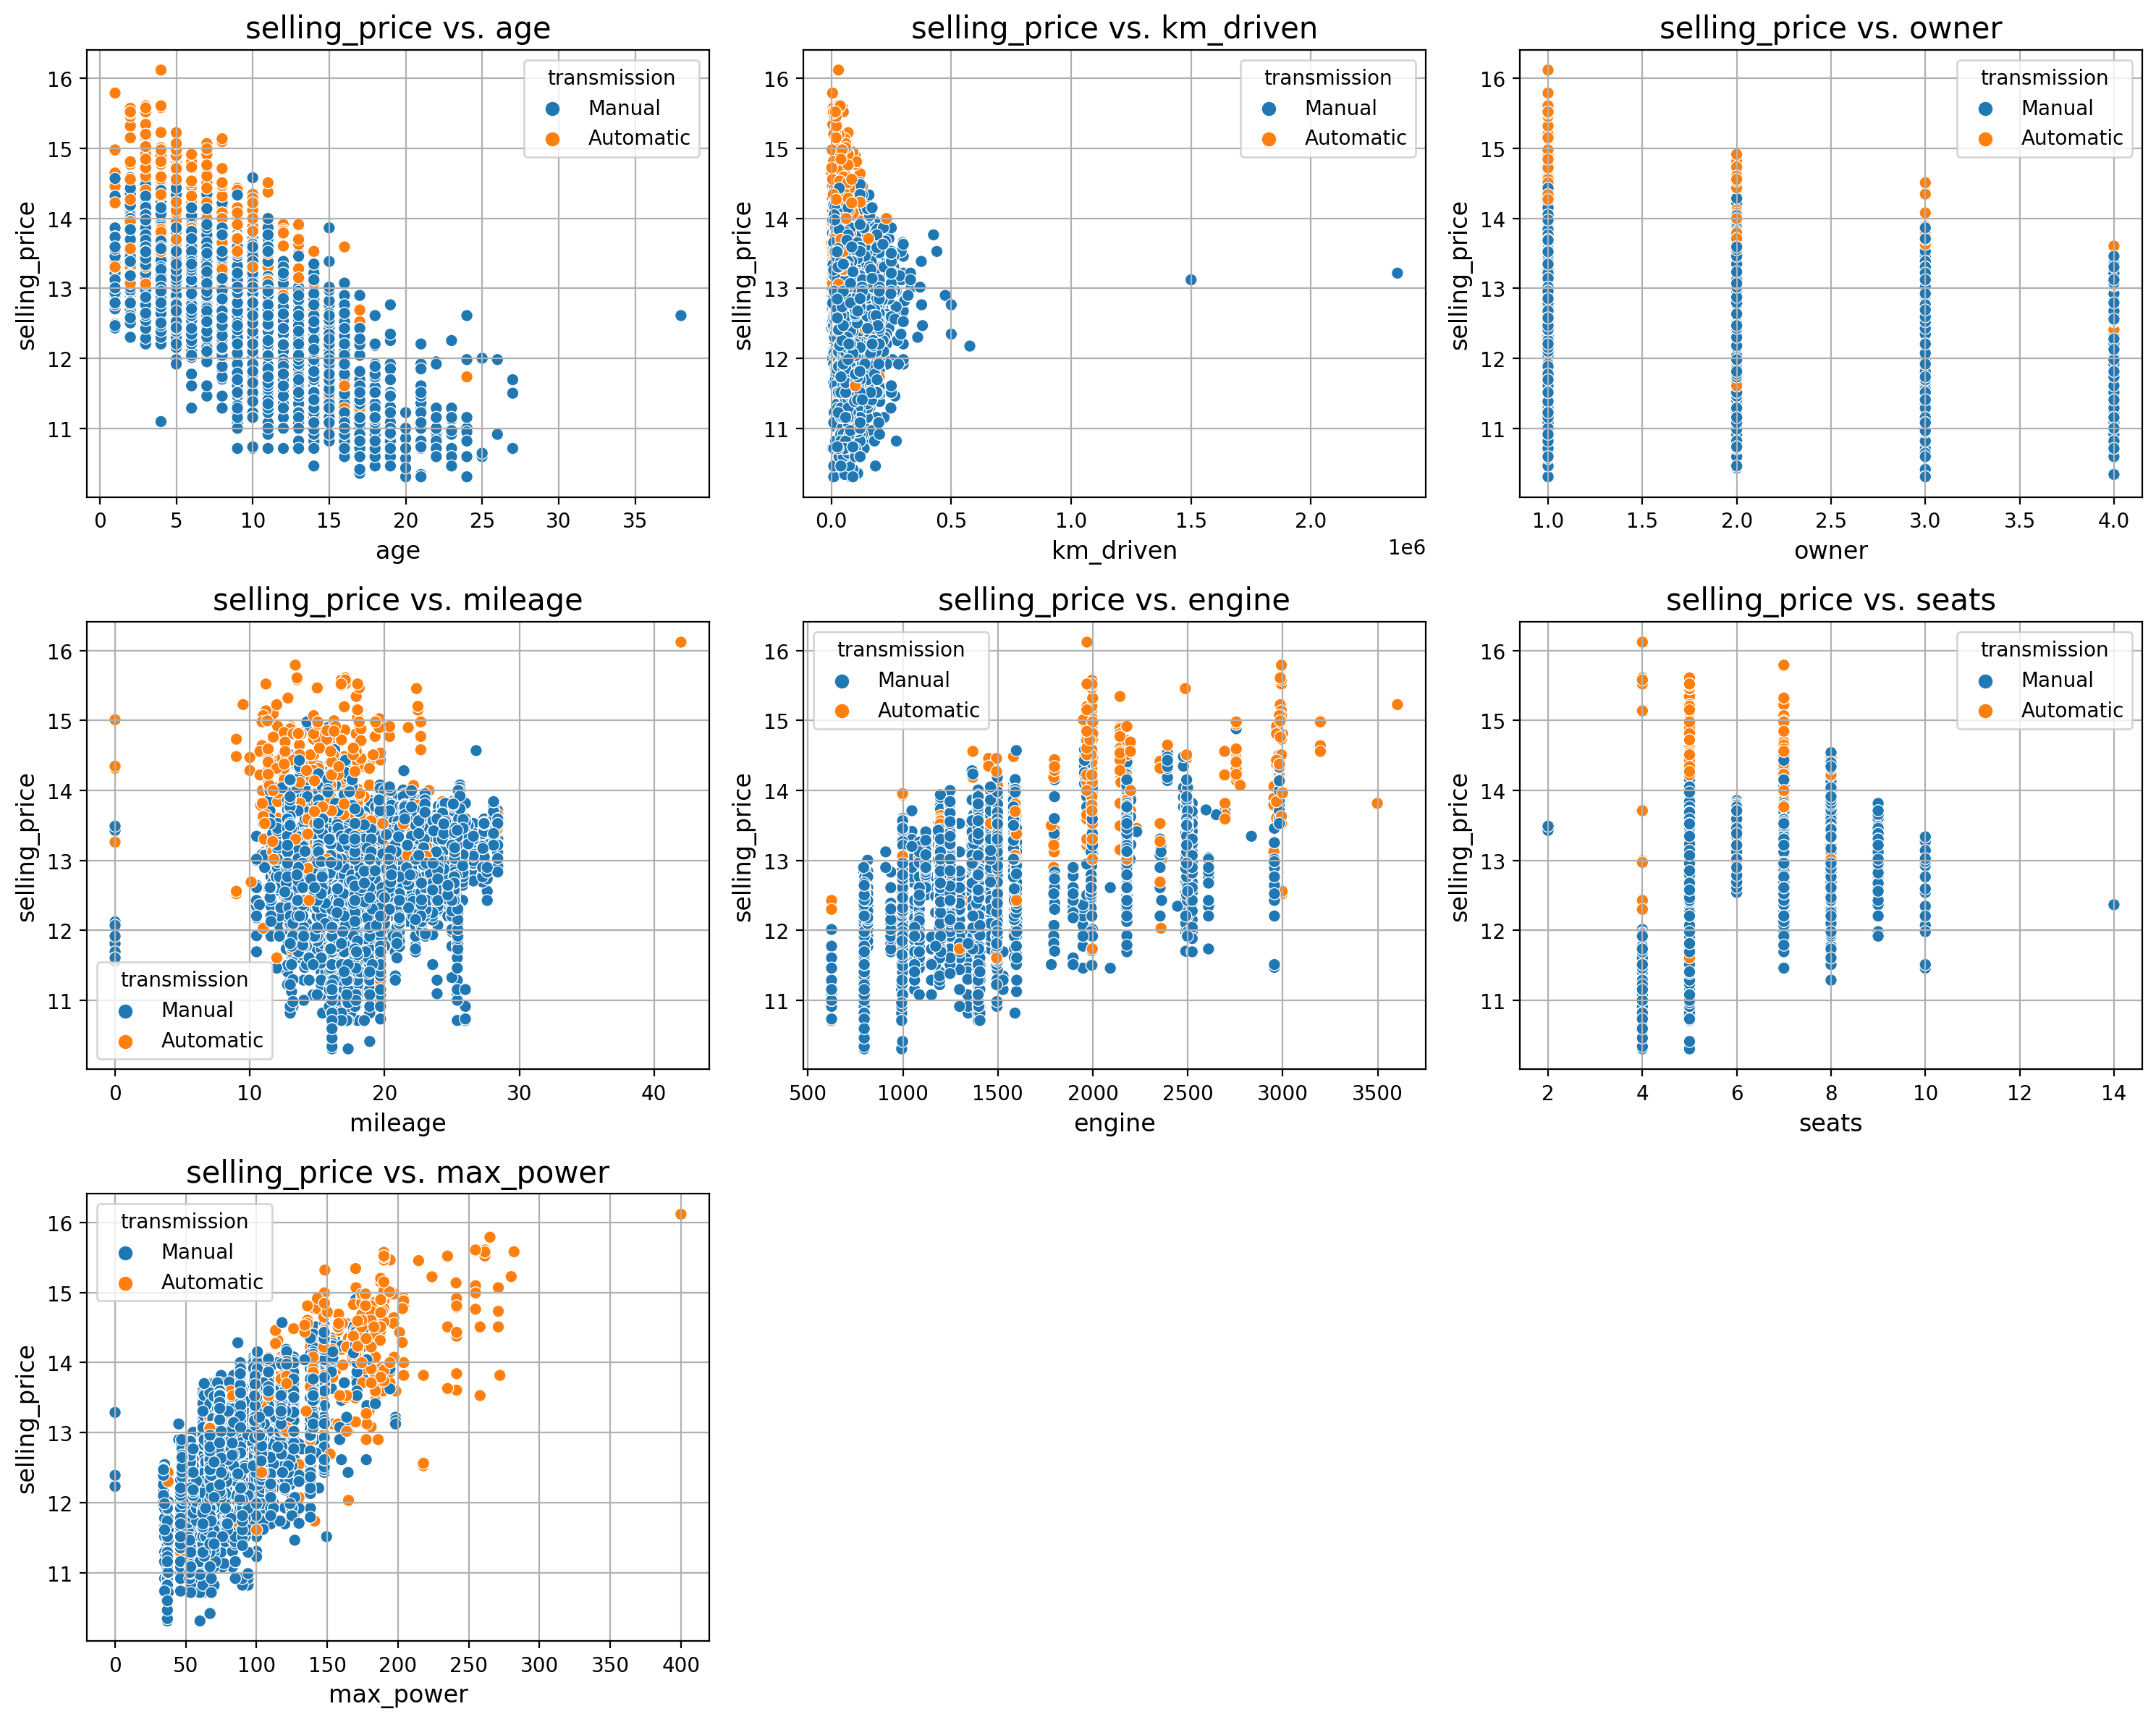

In [43]:
# Loop through each categorical column to create scatter plots.
# Each plot visualizes the relationship between all numerical features and 'selling_price',
# with color-coding (hue) based on different categories of the current categorical variable.
for cat_col in categorical_cols:
    do_scatterplot(numerical_cols[:-1], numerical_cols[-1], cat_col, 3, 3)


Selling Price vs. Numerical Feature Analysis:

--Age of Car: There's an inverse relationship between the car's age and its selling price. Older cars tend to sell for less.

--Kilometers Driven: Cars with higher mileage sell for lower prices, indicating an inverse relationship between 'Km_driven' and 'selling_price'.

--Number of Previous Owners: The selling price decreases as the number of previous owners increases, suggesting that cars with fewer owners are valued higher.

--Engine Size: Larger engines correlate with higher selling prices, suggesting a positive relationship between engine size and selling price.

--Max Power: Cars with higher max power tend to have higher selling prices, indicating a direct proportionality between 'max_power' and 'selling_price'.

Selling Price vs. Categorical Feature Analysis:

--Fuel Type: Diesel cars generally have higher selling prices compared to petrol cars.

--Seller Type: Cars sold by dealers tend to have higher selling prices than those sold by individuals.

--Transmission Type: Automatic cars are priced higher than manual ones, indicating a preference or higher value for automatic transmission in the market.

#### Correlation Matrix

In [44]:
data_frame_cp.corr()

selling_price  km_driven     owner   mileage    engine  \
selling_price       1.000000  -0.250714 -0.400123 -0.033074  0.516000   
km_driven          -0.250714   1.000000  0.290474 -0.173733  0.209019   
owner              -0.400123   0.290474  1.000000 -0.174818  0.007559   
mileage            -0.033074  -0.173733 -0.174818  1.000000 -0.578707   
engine              0.516000   0.209019  0.007559 -0.578707  1.000000   
max_power           0.729258  -0.036235 -0.110228 -0.372881  0.701834   
seats               0.187066   0.228646  0.030173 -0.454411  0.610481   
age                -0.712151   0.417761  0.513135 -0.328817 -0.016725   

               max_power     seats       age  
selling_price   0.729258  0.187066 -0.712151  
km_driven      -0.036235  0.228646  0.417761  
owner          -0.110228  0.030173  0.513135  
mileage        -0.372881 -0.454411 -0.328817  
engine          0.701834  0.610481 -0.016725  
max_power       1.000000  0.189248 -0.226345  
seats           0.189248  1.000000  0.007718  
age            -0.226345  0.007718  1.000000

<Axes: >

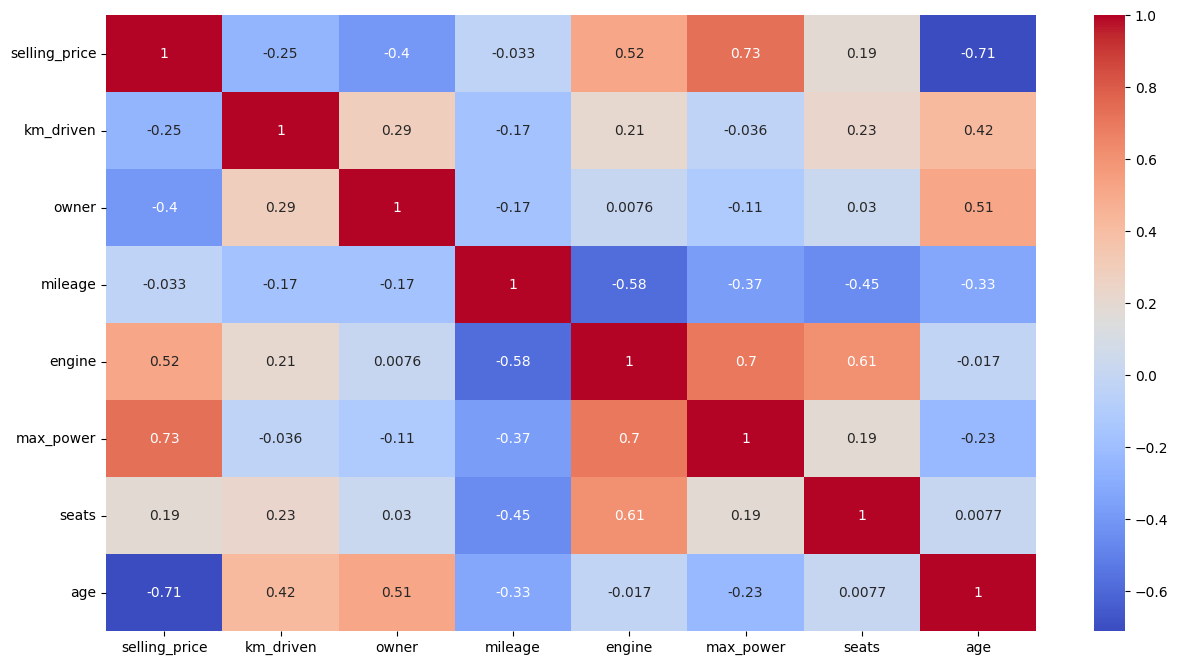

In [45]:
# Generate a heatmap to visualize the correlation matrix of the dataset.
# This helps in understanding the relationships between different numerical variables.
# Note: This heatmap only includes numerical variables; categorical variables are not represented here.

plot_lib.figure(figsize=(15, 8))
sns.heatmap(data_frame_cp.corr(), annot=True, cmap="coolwarm")

# Displaying the heatmap using matplotlib and seaborn


#### Selling Price:
There is a strong positive correlation with max_power (0.73), indicating that cars with higher max power tend to sell for higher prices.
There is a strong negative correlation with age (-0.71), suggesting that newer cars (lower age) sell for higher prices.

#### Km Driven:
There is a moderate positive correlation with age (0.42), which could imply that older cars have typically been driven more.
There is a negative correlation with selling_price (-0.25), supporting the idea that cars with higher mileage tend to sell for less.

#### Owner:
There is a positive correlation with age (0.51), indicating that older cars are more likely to have had more owners.
There is a moderate negative correlation with selling_price (-0.4), aligning with the observation that cars with more owners tend to sell for lower prices.

#### Engine Size:
Shows a moderate positive correlation with selling_price (0.52), suggesting that cars with larger engines are valued higher in the market.
There is a moderate positive correlation with seats (0.61), which could be due to larger cars with more seats generally having bigger engines.

#### Max Power:
Exhibits a strong positive correlation with selling_price (0.73), reinforcing that cars with greater max power command higher prices.

#### Seats:
There is a negative correlation with mileage (-0.45) and engine (-0.45), perhaps indicating that cars with more seats, which could be larger vehicles like SUVs or vans, have generally lower fuel efficiency (mileage).

#### Age:
As previously noted, there is a strong negative correlation with selling_price (-0.71), which matches the observation that newer cars sell for more.

#### Categorical Variables Encoding

Now we would like to change categorical variables to number, since machine learning algorithms do not understand text. 

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
data_frame_cp.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'age'],
      dtype='object')

__Dummy encoding, also known as one-hot encoding, is used to convert categorical variables into a format that can be used in machine learning algorithms. It is often used when dealing with categorical data that cannot be directly used in mathematical models like linear regression or neural networks__
- We implement dummy encoding on categorical columns, since they are all nominal variables:

In [48]:
# Identifying the categorical columns that will undergo one-hot encoding.
cat_cols = ['fuel', 'seller_type', 'transmission']

In [49]:

# Applying pandas' get_dummies function to one-hot encode the categorical columns.
# The drop_first parameter is set to True to avoid multicollinearity by removing the first category.
data_frame_cp = pd.get_dummies(data_frame_cp, columns=cat_cols, drop_first=True)

# Displaying the first five rows to verify the changes after one-hot encoding.
data_frame_cp.head(5)

selling_price  km_driven  owner  mileage  engine  max_power  seats  age  \
0      13.017003     145500      1    23.40  1248.0      74.00    5.0    7   
1      12.821258     120000      2    21.14  1498.0     103.52    5.0    7   
2      11.970350     140000      3    17.70  1497.0      78.00    5.0   15   
3      12.323856     127000      1    23.00  1396.0      90.00    5.0   11   
4      11.775290     120000      1    16.10  1298.0      88.20    5.0   14   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            1                       1                             0   
3            0                       1                             0   
4            1                       1                             0   

   transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [50]:
# Verify again the correlation
data_frame_cp.corr()

selling_price  km_driven     owner   mileage  \
selling_price                      1.000000  -0.250714 -0.400123 -0.033074   
km_driven                         -0.250714   1.000000  0.290474 -0.173733   
owner                             -0.400123   0.290474  1.000000 -0.174818   
mileage                           -0.033074  -0.173733 -0.174818  1.000000   
engine                             0.516000   0.209019  0.007559 -0.578707   
max_power                          0.729258  -0.036235 -0.110228 -0.372881   
seats                              0.187066   0.228646  0.030173 -0.454411   
age                               -0.712151   0.417761  0.513135 -0.328817   
fuel_Petrol                       -0.321905  -0.270750 -0.015134 -0.069086   
seller_type_Individual            -0.362525   0.204142  0.223936  0.008412   
seller_type_Trustmark Dealer       0.093023  -0.084538 -0.077423 -0.035549   
transmission_Manual               -0.493924   0.200960  0.149047  0.177860   

                                engine  max_power     seats       age  \
selling_price                 0.516000   0.729258  0.187066 -0.712151   
km_driven                     0.209019  -0.036235  0.228646  0.417761   
owner                         0.007559  -0.110228  0.030173  0.513135   
mileage                      -0.578707  -0.372881 -0.454411 -0.328817   
engine                        1.000000   0.701834  0.610481 -0.016725   
max_power                     0.701834   1.000000  0.189248 -0.226345   
seats                         0.610481   0.189248  1.000000  0.007718   
age                          -0.016725  -0.226345  0.007718  1.000000   
fuel_Petrol                  -0.503851  -0.298088 -0.352095  0.049176   
seller_type_Individual       -0.128742  -0.280548  0.083137  0.246700   
seller_type_Trustmark Dealer  0.037387   0.025456 -0.029106 -0.102738   
transmission_Manual          -0.280823  -0.539233  0.074478  0.244663   

                              fuel_Petrol  seller_type_Individual  \
selling_price                   -0.321905               -0.362525   
km_driven                       -0.270750                0.204142   
owner                           -0.015134                0.223936   
mileage                         -0.069086                0.008412   
engine                          -0.503851               -0.128742   
max_power                       -0.298088               -0.280548   
seats                           -0.352095                0.083137   
age                              0.049176                0.246700   
fuel_Petrol                      1.000000               -0.003889   
seller_type_Individual          -0.003889                1.000000   
seller_type_Trustmark Dealer     0.141325               -0.386209   
transmission_Manual             -0.029313                0.372892   

                              seller_type_Trustmark Dealer  \
selling_price                                     0.093023   
km_driven                                        -0.084538   
owner                                            -0.077423   
mileage                                          -0.035549   
engine                                            0.037387   
max_power                                         0.025456   
seats                                            -0.029106   
age                                              -0.102738   
fuel_Petrol                                       0.141325   
seller_type_Individual                           -0.386209   
seller_type_Trustmark Dealer                      1.000000   
transmission_Manual                              -0.149513   

                              transmission_Manual  
selling_price                           -0.493924  
km_driven                                0.200960  
owner                                    0.149047  
mileage                                  0.177860  
engine                                  -0.280823  
max_power                               -0.53923

<Axes: >

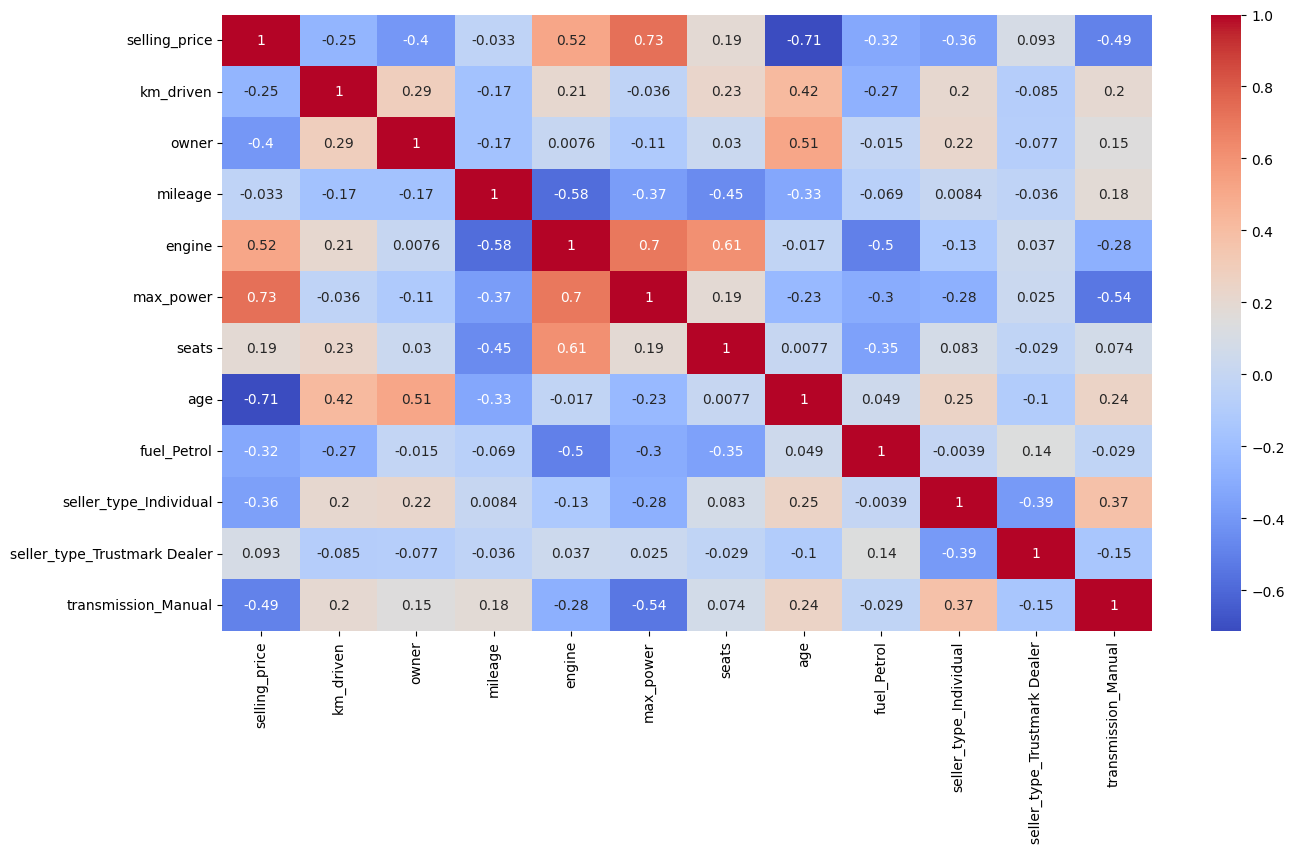

In [51]:
# Check out heatmap
plot_lib.figure(figsize = (15,8))
sns.heatmap(data_frame_cp.corr(), annot=True, cmap="coolwarm")  

#### Selling Price:
Shows a strong positive correlation with max_power (0.73).
Shows a strong negative correlation with age (-0.71) and transmission_Manual (-0.49).
Shows a moderate negative correlation with fuel_Petrol (-0.32) and seller_type_Individual (-0.36).

#### Km Driven:
Shows a moderate positive correlation with age (0.42).
Shows a slight negative correlation with fuel_Petrol (-0.27).

#### Owner:
Shows a positive correlation with age (0.51).
Does not show a strong correlation with any of the one-hot encoded categorical variables.

#### Engine Size:
Shows a moderate positive correlation with seats (0.61) and max_power (0.7).
No strong correlation with one-hot encoded categorical variables is apparent.

#### Max Power:
Shows a strong positive correlation with selling_price (0.73).
Shows a negative correlation with transmission_Manual (-0.54).

#### Categorical Variables (One-Hot Encoded):
fuel_Petrol shows a moderate negative correlation with selling_price (-0.32), which may suggest that petrol cars tend to be cheaper compared to their diesel counterparts.

seller_type_Individual also has a moderate negative correlation with selling_price (-0.36), indicating individual sellers might sell cars at lower prices than dealers.

transmission_Manual has a strong negative correlation with selling_price (-0.49), implying that manual cars are generally sold for less than automatic ones.

In [52]:
# Verify the description of target variable selling_price
data_frame_cp.selling_price.describe()

count    8028.000000
mean       12.979337
std         0.838039
min        10.308919
25%        12.468437
50%        13.017003
75%        13.429848
max        16.118096
Name: selling_price, dtype: float64

In [53]:
data_frame_cp.info

<bound method DataFrame.info of       selling_price  km_driven  owner  mileage  engine  max_power  seats  age  \
0         13.017003     145500      1    23.40  1248.0      74.00    5.0    7   
1         12.821258     120000      2    21.14  1498.0     103.52    5.0    7   
2         11.970350     140000      3    17.70  1497.0      78.00    5.0   15   
3         12.323856     127000      1    23.00  1396.0      90.00    5.0   11   
4         11.775290     120000      1    16.10  1298.0      88.20    5.0   14   
...             ...        ...    ...      ...     ...        ...    ...  ...   
8123      12.676076     110000      1    18.50  1197.0      82.85    5.0    8   
8124      11.813030     119000      4    16.80  1493.0     110.00    5.0   14   
8125      12.853176     120000      1    19.30  1248.0      73.90    5.0   12   
8126      12.577636      25000      1    23.57  1396.0      70.00    5.0    8   
8127      12.577636      25000      1    23.57  1396.0      70.00    5.0    8

In [54]:
data_frame_cp.shape

(8028, 12)

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

In [55]:
import ppscore as pps
data_framecopy = data_frame_cp.copy()
data_framecopy.head(2)

selling_price  km_driven  owner  mileage  engine  max_power  seats  age  \
0      13.017003     145500      1    23.40  1248.0      74.00    5.0    7   
1      12.821258     120000      2    21.14  1498.0     103.52    5.0    7   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   

   transmission_Manual  
0                    1  
1                    1

<Axes: xlabel='x', ylabel='y'>

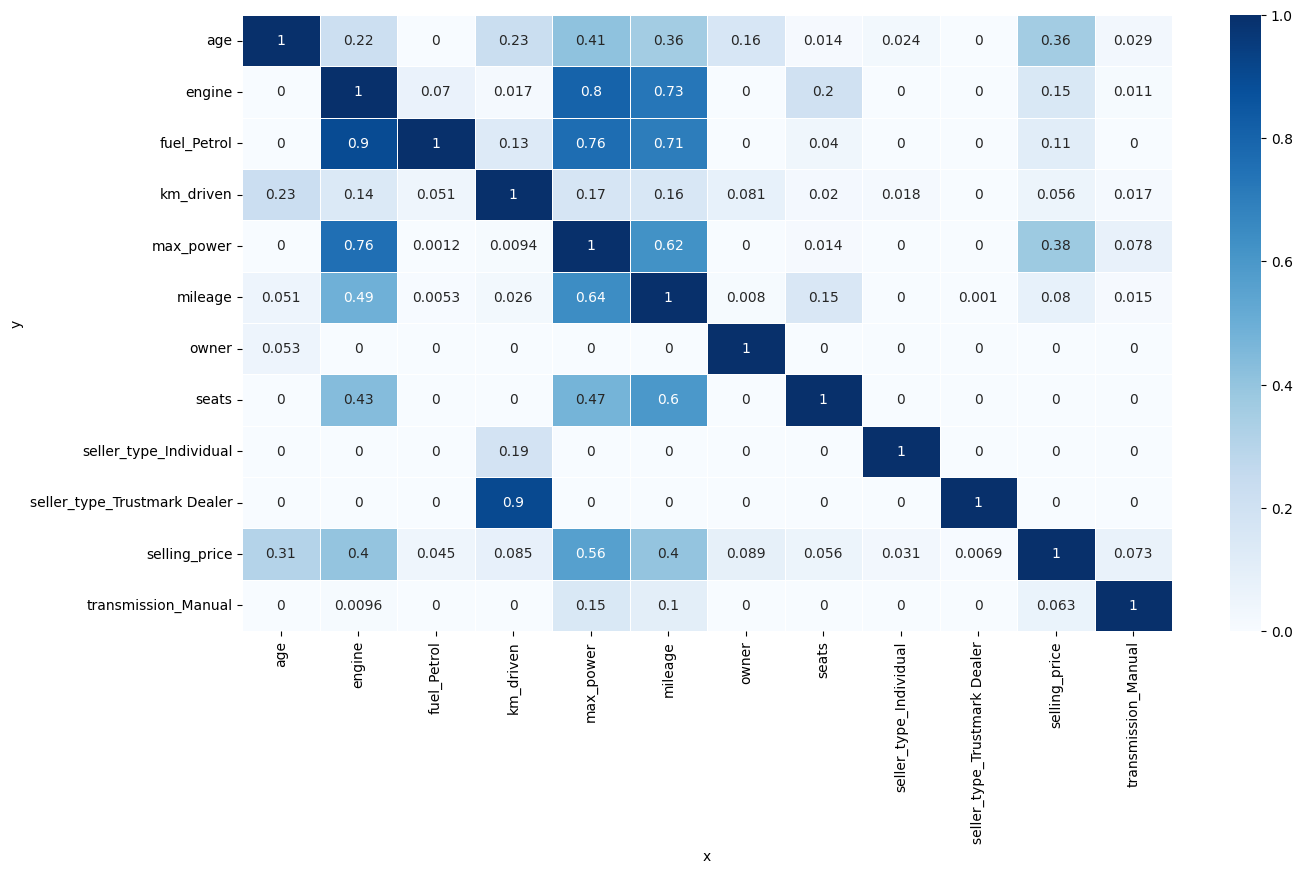

In [56]:
# Transforming the PPS matrix from the 'data_framecopy' into a format suitable for Seaborn's heatmap.
# Seaborn requires data in a wide format, so we pivot the DataFrame accordingly.
matrix_data_frame = pps.matrix(data_framecopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plotting the heatmap with the PPS matrix to visualize predictive relationships between variables.
# The 'vmin' and 'vmax' parameters set the scale of the heatmap to [0,1] for PPS values.
plot_lib.figure(figsize=(15, 8))
sns.heatmap(matrix_data_frame, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# Displaying the heatmap using matplotlib and seaborn for data visualization.


Age:

Has a PPS of 0.36 with respect to selling_price, suggesting a moderate predictive relationship where the age of a car can help predict its selling price.

Engine:

Has a significant PPS of 0.8 with max_power, indicating that the size of the engine is highly predictive of the car's power output.

Fuel_Petrol:

Shows a PPS of 0.9 with engine, which is expected.

Km_Driven:

Has a low PPS with respect to selling_price (0.05), suggesting it is not a strong predictor of the selling price on its own.

Max_Power:

Shows a PPS of 0.38 with selling_price, indicating a reasonably strong predictive power on the selling price.
Has a PPS of 0.76 with engine, further confirming the strong relationship between engine size and max power.

Milage: 

Show low PPS of 0.08 with selling_price

Seats:

Shows a good predictive relationship with engine (0.43), indicating that the number of seats might predict the engine size, possibly due to larger cars with more seats having bigger engines.

Seller_Type (Individual and Trustmark Dealer):

Both show low PPS scores with respect to selling_price, suggesting that seller type might not be a strong predictor of selling price in isolation.


In [57]:
matrix_data_frame

x                                  age    engine  fuel_Petrol  km_driven  \
y                                                                          
age                           1.000000  0.222055     0.000000   0.229023   
engine                        0.000000  1.000000     0.069660   0.017387   
fuel_Petrol                   0.000000  0.895451     1.000000   0.132435   
km_driven                     0.225809  0.141704     0.050530   1.000000   
max_power                     0.000000  0.756933     0.001234   0.009433   
mileage                       0.051472  0.489375     0.005341   0.026304   
owner                         0.053151  0.000000     0.000000   0.000000   
seats                         0.000000  0.434820     0.000000   0.000000   
seller_type_Individual        0.000000  0.000000     0.000000   0.187275   
seller_type_Trustmark Dealer  0.000000  0.000000     0.000000   0.902778   
selling_price                 0.305694  0.400260     0.045359   0.085313   
transmission_Manual           0.000000  0.009604     0.000000   0.000000   

x                             max_power   mileage     owner     seats  \
y                                                                       
age                            0.413778  0.360144  0.161160  0.013814   
engine                         0.802366  0.728124  0.000000  0.202970   
fuel_Petrol                    0.764726  0.705006  0.000000  0.040006   
km_driven                      0.171490  0.159408  0.080614  0.019534   
max_power                      1.000000  0.624556  0.000000  0.014336   
mileage                        0.642448  1.000000  0.007956  0.154664   
owner                          0.000000  0.000000  1.000000  0.000000   
seats                          0.472874  0.596884  0.000000  1.000000   
seller_type_Individual         0.000000  0.000000  0.000000  0.000000   
seller_type_Trustmark Dealer   0.000000  0.000000  0.000000  0.000000   
selling_price                  0.562849  0.398532  0.088934  0.056003   
transmission_Manual            0.150322  0.101875  0.000000  0.000000   

x                             seller_type_Individual  \
y                                                      
age                                         0.024045   
engine                                      0.000000   
fuel_Petrol                                 0.000000   
km_driven                                   0.017607   
max_power                                   0.000000   
mileage                                     0.000000   
owner                                       0.000000   
seats                                       0.000000   
seller_type_Individual                      1.000000   
seller_type_Trustmark Dealer                0.000000   
selling_price                               0.031140   
transmission_Manual                         0.000000   

x                             seller_type_Trustmark Dealer  selling_price  \
y                                                                           
age                                               0.000000       0.360736   
engine                                            0.000000       0.151150   
fuel_Petrol                                       0.000000       0.111415   
km_driven                                         0.000000       0.056304   
max_power                                         0.000000       0.376912   
mileage                                           0.001037       0.080399   
owner                                             0.000000       0.000000   
seats                                             0.000000       0.000000   
seller_type_Individual                            0.000000       0.000000   
seller_type_Trustmark Dealer                      1.000000       0.000000   
selling_price                                     0.006873       1.000000   
transmission_Manual                               0.000000       0.062975   

x                             transmission_Manua

## 3. Feature Engineering
We skipped this part

## 4. Feature selection

In [58]:
data_frame_cp

selling_price  km_driven  owner  mileage  engine  max_power  seats  age  \
0         13.017003     145500      1    23.40  1248.0      74.00    5.0    7   
1         12.821258     120000      2    21.14  1498.0     103.52    5.0    7   
2         11.970350     140000      3    17.70  1497.0      78.00    5.0   15   
3         12.323856     127000      1    23.00  1396.0      90.00    5.0   11   
4         11.775290     120000      1    16.10  1298.0      88.20    5.0   14   
...             ...        ...    ...      ...     ...        ...    ...  ...   
8123      12.676076     110000      1    18.50  1197.0      82.85    5.0    8   
8124      11.813030     119000      4    16.80  1493.0     110.00    5.0   14   
8125      12.853176     120000      1    19.30  1248.0      73.90    5.0   12   
8126      12.577636      25000      1    23.57  1396.0      70.00    5.0    8   
8127      12.577636      25000      1    23.57  1396.0      70.00    5.0    8   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0               0                       1                             0   
1               0                       1                             0   
2               1                       1                             0   
3               0                       1                             0   
4               1                       1                             0   
...           ...                     ...                           ...   
8123            1                       1                             0   
8124            0                       1                             0   
8125            0                       1                             0   
8126            0                       1                             0   
8127            0                       1                             0   

      transmission_Manual  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8123                    1  
8124                    1  
8125                    1  
8126                    1  
8127                    1  

[8028 rows x 12 columns]

In [59]:
data_frame_cp.columns

Index(['selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'seats', 'age', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

We chose the specific features 'km_driven', 'mileage', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual' for predicting the 'selling_price' for the following reasons -  

'km_driven': Indicates usage and wear, with lower mileage possibly commanding higher prices due to less perceived wear and longer remaining vehicle life.

'mileage': Represents fuel efficiency, which can affect ongoing costs for the buyer and may influence the selling price due to the operational cost savings.

'age': Directly relates to a car's condition, with newer cars typically selling at higher prices. Expert consultation in Tokyo also confirmed that age is a primary factor in pricing used cars.

'engine': Engine size can be a proxy for performance and driving experience. Larger engines may attract a premium due to higher performance, as also noted by industry experts in Tokyo.

'fuel_Petrol': Different fuel types can influence operational costs and buyer demand, with petrol cars having their own market based on fuel preferences and potential environmental considerations.

'transmission_Manual': Affects the driving experience and may be preferred for its lower cost and control, potentially influencing the selling price based on market preferences for transmission types.

In [60]:
# Define a list of features selected for predicting the 'selling_price' based on their importance as indicated by EDA and domain expertise.
feature_list = ['km_driven', 'age', 'engine', 'max_power', 'fuel_Petrol', 'transmission_Manual']


In [61]:
# Create the feature matrix X by selecting the specified features
X = data_frame_cp[feature_list]

# Create the target vector y using the 'selling_price' column
y = data_frame_cp['selling_price']


In [62]:
X

km_driven  age  engine  max_power  fuel_Petrol  transmission_Manual
0        145500    7  1248.0      74.00            0                    1
1        120000    7  1498.0     103.52            0                    1
2        140000   15  1497.0      78.00            1                    1
3        127000   11  1396.0      90.00            0                    1
4        120000   14  1298.0      88.20            1                    1
...         ...  ...     ...        ...          ...                  ...
8123     110000    8  1197.0      82.85            1                    1
8124     119000   14  1493.0     110.00            0                    1
8125     120000   12  1248.0      73.90            0                    1
8126      25000    8  1396.0      70.00            0                    1
8127      25000    8  1396.0      70.00            0                    1

[8028 rows x 6 columns]

### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [63]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set the test_size to 0.3 for a 70-30 train-test split
# Use the random_state parameter for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 6), (2409, 6), (5619,), (2409,))

In [65]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Test Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Test Dataset Size 2409


In [66]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]


## 5. Preprocessing

### Check Null values

In [67]:
# Verify for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
max_power              149
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [68]:
#   Verify for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
max_power              59
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [69]:
# Verify for null values in the training target vector y_train
y_train.isna().sum()

0

In [70]:
# Verify for null values in the training target vector y_test
y_test.isna().sum()

0

In [71]:
len(feature_list)

6

In [72]:
feature_list

['km_driven',
 'age',
 'engine',
 'max_power',
 'fuel_Petrol',
 'transmission_Manual']

__Among the 6 features 'max_power' and 'engine' contains null values__

In [73]:
# Impute the missing values in the 'engine' feature for both training and test sets
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].mean(), inplace=True)

# Impute the missing values in the 'max_power' feature for both training and test sets
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)


In [74]:
# Verify again for null values 
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
max_power              0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [75]:
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
max_power              0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [76]:
#  Verify for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

{'km_driven': 1, 'age': 2, 'engine': 3, 'max_power': 4, 'fuel_Petrol': 5, 'transmission_Manual': 6}


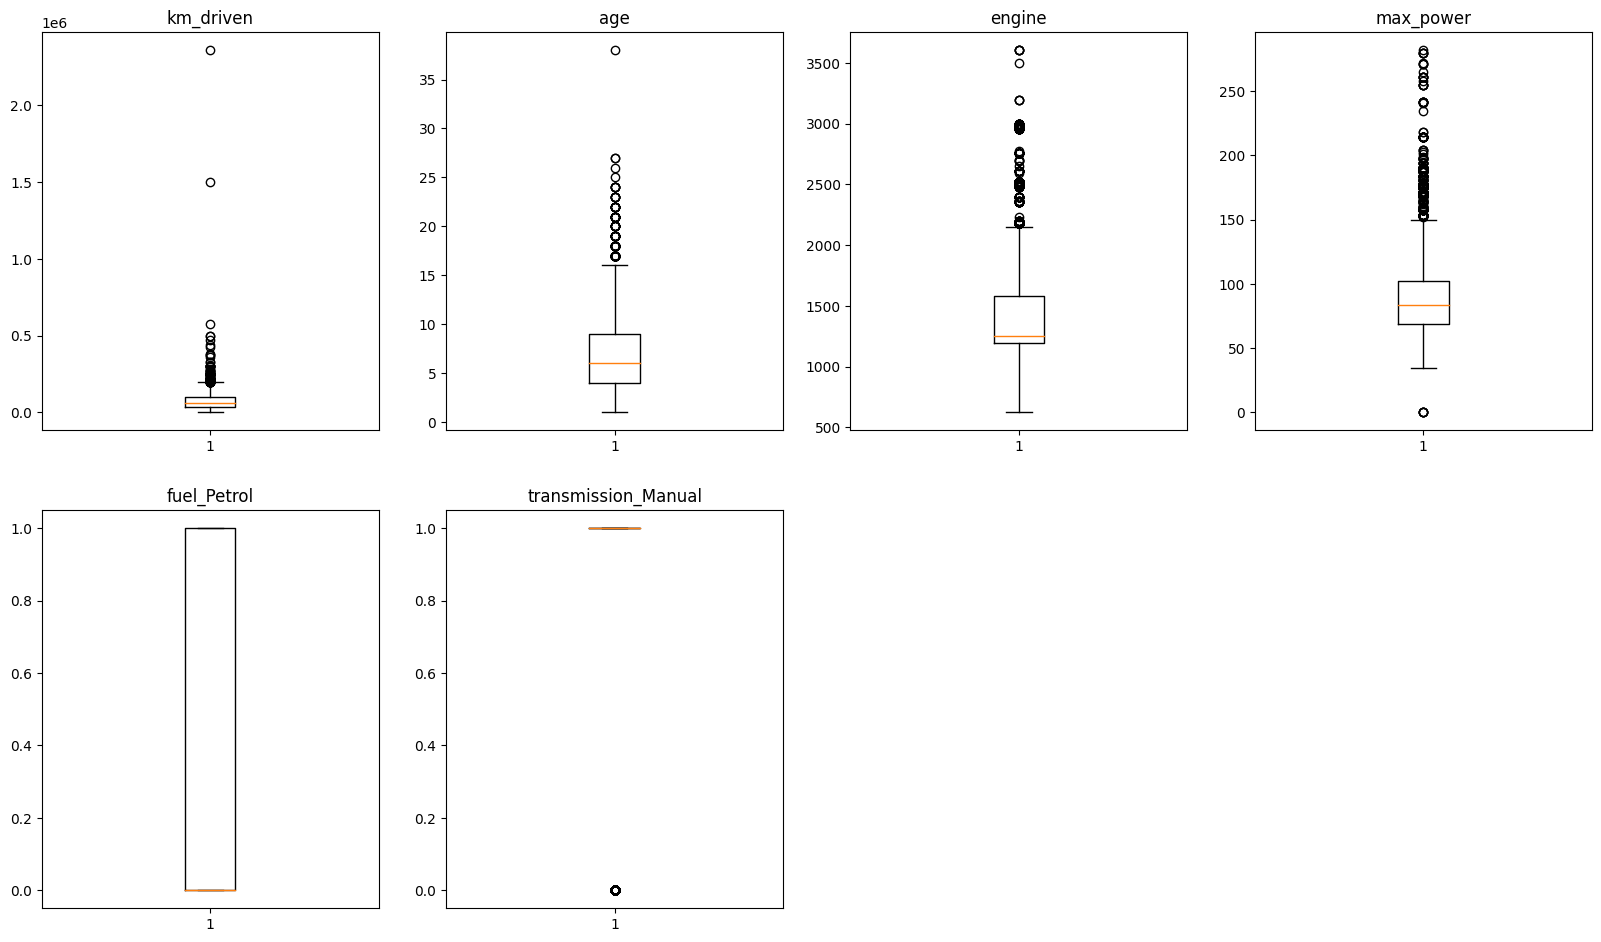

In [77]:
col_dict = {feature: indx+1 for indx, feature in enumerate(feature_list)}
print(col_dict)

# [ Detect outliers in each variable using box plots
plot_lib.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plot_lib.subplot(5,4,i)
                     plot_lib.boxplot(X_train[variable])
                     plot_lib.title(variable)

plot_lib.show()


In [78]:
def outlier_count(col, data=X_train):
    # Calculate the 75th and 25th percentiles
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate the interquartile range (IQR)
    iqr = q75 - q25
    
    # Define the minimum and maximum values for identifying outliers based on the IQR
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    
    # Find the indices of outliers using NumPy
    outlier_indices = np.where((data[col] > max_val) | (data[col] < min_val))
    outlier_count = len(outlier_indices[0])
    
    # Calculate the percentage of outliers
    outlier_percent = round(outlier_count / len(data[col]) * 100, 2)
    
    if outlier_count > 0:
        print("\n" + 15 * '-' + col + 15 * '-' + "\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))


In [79]:
# Iterate through the columns of the training feature matrix
for col in X_train.columns:
    # Print the name of the current column
    print(col)
    # Apply the 'outlier_count' function to detect and analyze outliers in the current column
    outlier_count(col)


km_driven

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%
age

---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
engine

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%
max_power

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%
fuel_Petrol
transmission_Manual

---------------transmission_Manual---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%


 **Before Scalling we preserve mean of  the input feature (will be used later deployment where user won't input  value of a particular feature )**

In [80]:
max_year = data_frame['year'].max()
mean_age = X_train['age'].mean()
mean_km_driven = X_train['km_driven'].mean()
mean_engine_size = X_train['engine'].mean()
mean_max_power = X_train['max_power'].mean()

max_year,mean_age, mean_km_driven, mean_engine_size, mean_max_power

(2020,
 7.137924897668625,
 70029.87346502936,
 1463.855626715462,
 92.04935009140767)

### Scaling

__Feature scaling helps improve reach convergence faster__
- using the StandardScaler from sklearn.preprocessing to standardize the numerical features in the training and testing sets.
- Categorical features are typically represented as binary or one-hot encoded vectors. These representations are already in a consistent format that doesn't have varying magnitudes like numerical features.

In [81]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
continuous_features = ['km_driven', 'age', 'engine', 'max_power']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected numerical features in the training set
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Standardize the selected numerical features in the testing set
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


In [82]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression_model.predict(X_test)

# Compute and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Compute and print the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score: ", r2)


Mean Squared Error (MSE):  0.09686179597427838
R-squared (R2) Score:  0.8623314269450717


The Linear Regression model achieved the following performance metrics on the test data:

Mean Squared Error (MSE): 0.0968
R-squared (R2) Score: 0.86233
The MSE measures the average squared difference between the predicted and actual selling prices. A lower MSE indicates better model performance.

The R-squared (R2) score measures the proportion of the variance in the target variable (selling prices) that is explained by the model. In this case, the model explains approximately 86.23% of the variance in selling prices, which indicates a good fit to the data.

### Cross validation + Grid search

In [84]:
# Import necessary regression models from scikit-learn
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a list of regression models for evaluation
algorithms = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0)
]

# List of algorithm names for identification
algorithm_names = [
    "Linear Regression",
    "SVR",
    "KNeighbors Regressor",
    "Decision-Tree Regressor",
    "Random-Forest Regressor"
]


Let's do some simple cross-validation here....

__using KFold cross-validation to evaluate the performance of different regression models__

In [85]:
# Import the KFold cross-validator from scikit-learn
from sklearn.model_selection import KFold, cross_val_score

# Initialize the KFold cross-validator with 5 splits and shuffling
kfold = KFold(n_splits=5, shuffle=True)

# Iterate through each regression model and perform cross-validation
for i, model in enumerate(algorithms):
    # Perform cross-validation and get negative mean squared error scores
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")


Linear Regression - Score: [-0.09587971 -0.10520629 -0.09947395 -0.10242444 -0.09361431]; Mean: -0.09931974090744862


SVR - Score: [-0.07388607 -0.06980864 -0.07394733 -0.07068143 -0.07472018]; Mean: -0.07260872938812435
KNeighbors Regressor - Score: [-0.07752115 -0.07052608 -0.07186525 -0.06980676 -0.07540167]; Mean: -0.07302417951105492
Decision-Tree Regressor - Score: [-0.10350688 -0.08457581 -0.07900848 -0.08522321 -0.08505066]; Mean: -0.08747300825007606
Random-Forest Regressor - Score: [-0.05245377 -0.0549649  -0.06022536 -0.05945735 -0.05619266]; Mean: -0.05665881026724825


- The negative sign is used because- 
    - scikit-learn's cross-validation functions aim to maximize the score, but for error metrics like MSE, lower values are better. 
    - By negating the MSE, the maximization convention is still upheld, and higher (negative) values indicate better performance.

Among the regression models evaluated, the "Random-Forest Regressor" performed the best in terms of mean squared error (MSE). It had the lowest mean MSE score of approximately -0.0574, which indicates better performance in predicting the selling prices compared to the other models.

### Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid to search through
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': range(100)}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=1)

# Initialize GridSearchCV with the defined hyperparameter grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,  # Assuming kfold is previously defined
                    n_jobs=-1,  # Use all available CPU cores
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data to find the best hyperparameters
grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': range(0, 100)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 80}

In [88]:
# Find grid_search's best score
best_mse = grid.best_score_

In [89]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-0.0561098008134315

## 7. Testing


In [90]:
# Use the trained GridSearchCV model to make predictions on the test set
yhat = grid.predict(X_test)

# Compute the mean squared error (MSE) between the actual target values (y_test) and the predicted values (yhat)
mean_squared_error(y_test, yhat)


0.05238538565018584

In [91]:
def Prediction(X_test, y_test, start_iloc=0, end_iloc=10):
    """
    Make predictions using the trained model and compare with actual values.

    Parameters:
        X_test (DataFrame): Test data features.
        y_test (Series): Actual target values.
        start_iloc (int): Start index for the prediction loop.
        end_iloc (int): End index for the prediction loop.

    Returns:
        None (Prints predictions and losses for each case).
    """

    for i in range(start_iloc, end_iloc):
        print("Case No: {}".format(i + 1))
        # Reshape the input data for prediction
        x = np.array(X_test.iloc[i]).reshape(1, -1)
        pred_selling_price = grid.predict(x)

        print("Predicted Selling Price: ${:.2f}".format(np.exp(float(pred_selling_price[0]))))
        print("Actual Selling Price   : ${:.2f}".format(np.exp(float(y_test.iloc[i]))))
        
        # Calculate and print the loss
        actual_selling_price = y_test.iloc[i].reshape(1,)  # Make the shapes compatible for MSE calculation
        loss = mean_squared_error(np.array(actual_selling_price), pred_selling_price)
        print('Loss: {:.2f}'.format(loss))

In [92]:
start_iloc = 0
end_iloc = 10
Prediction(X_test, y_test, start_iloc, end_iloc)

Case No: 1
Predicted Selling Price: $230935.64
Actual Selling Price   : $225000.00
Loss: 0.00
Case No: 2
Predicted Selling Price: $916075.56
Actual Selling Price   : $900000.00
Loss: 0.00
Case No: 3
Predicted Selling Price: $328869.34
Actual Selling Price   : $320000.00
Loss: 0.00
Case No: 4
Predicted Selling Price: $513441.29
Actual Selling Price   : $650000.00
Loss: 0.06
Case No: 5
Predicted Selling Price: $586396.46
Actual Selling Price   : $520000.00
Loss: 0.01
Case No: 6
Predicted Selling Price: $232933.34
Actual Selling Price   : $170000.00
Loss: 0.10
Case No: 7
Predicted Selling Price: $336980.13
Actual Selling Price   : $280000.00
Loss: 0.03
Case No: 8
Predicted Selling Price: $462930.96
Actual Selling Price   : $500000.00
Loss: 0.01
Case No: 9
Predicted Selling Price: $285599.19
Actual Selling Price   : $170000.00
Loss: 0.27
Case No: 10
Predicted Selling Price: $393172.31
Actual Selling Price   : $335000.00
Loss: 0.03


## Analysis:  Feature Importance

__Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.__
__There are several techniques can be mostly applied__ 
- algorithm, 
- permutation,
- shap.  

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [93]:
rf = grid.best_estimator_
print(type(rf))
rf.feature_importances_

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


array([0.02043486, 0.47189684, 0.09002727, 0.40743881, 0.00713363,
       0.00306859])

In [94]:
print(X.columns)

Index(['km_driven', 'age', 'engine', 'max_power', 'fuel_Petrol',
       'transmission_Manual'],
      dtype='object')


<BarContainer object of 6 artists>

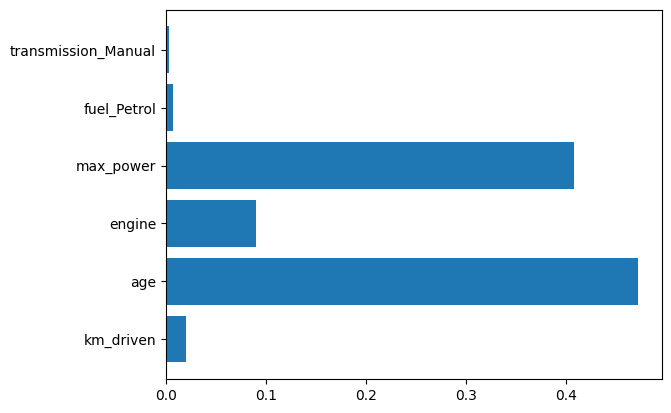

In [95]:
plot_lib.barh(X.columns, rf.feature_importances_)

[5 4 0 2 3 1]
<class 'numpy.ndarray'>


Text(0.5, 0, 'Random Forest Feature Importance')

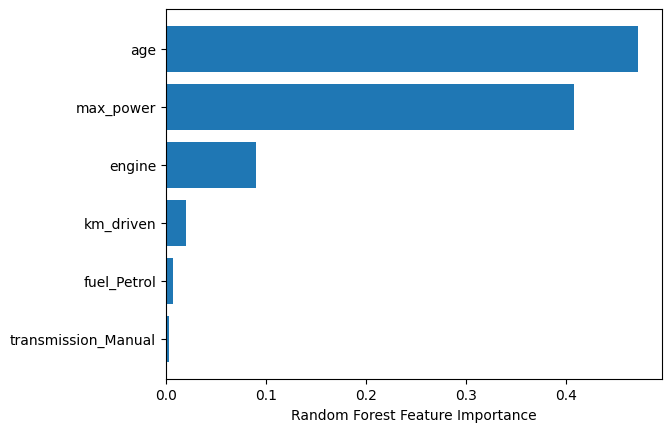

In [96]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
print(sorted_idx)
print(type(rf.feature_importances_))
plot_lib.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plot_lib.xlabel("Random Forest Feature Importance")

Age (0.45): The age of the car is the most critical factor, with more than half of the importance weight. This aligns with the common understanding that the value of a car depreciates over time, and thus, older cars are likely to sell for less.

Max Power (0.4): Max power of engine is also vert important after age

Engine (0.1): Engine details is  the third most significant factor. A more powerful or larger engine usually correlates with a higher price.

other three features are quite insignificant

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

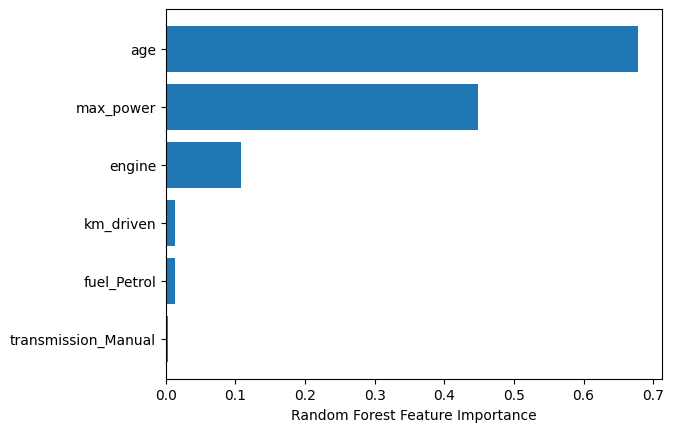

In [97]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances using the trained RandomForestRegressor (rf) on the test data
perm_importance = permutation_importance(rf, X_test, y_test)

# Sort the indices of features based on their mean permutation importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Create a horizontal bar plot to visualize feature importances
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**In permutation feature importance summary, the "age" and "engine" features are still the primary drivers of the model's predictive performance for selling price, followed by transmission type, kilometers driven, and fuel type.**

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [98]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

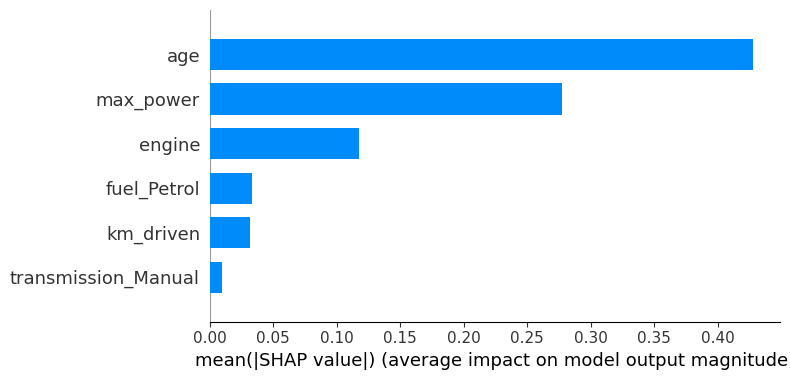

In [100]:
# shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

**In SHAP Feature importance summary, the "age" and "engine" features are still the primary drivers of the model's predictive performance for selling price, followed by transmission type, kilometers driven, and fuel type.**

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [101]:
import pickle
# save the model to disk
filename = 'app/code/model/model.model'
pickle.dump(grid, open(filename, 'wb'))

In [102]:
# Save the scaler's mean and scale parameters
scaler_path = "app/code/model/scaler.pkl"
scaler_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler_params, scaler_file)

In [103]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# load the scaling parameters
loaded_scaler_params = pickle.load(open(scaler_path, 'rb'))

# Create a new scaler with the loaded parameters
loaded_scaler = StandardScaler()
loaded_scaler.mean_ = loaded_scaler_params['mean']
loaded_scaler.scale_ = loaded_scaler_params['scale']

In [104]:
data_frame_cp

selling_price  km_driven  owner  mileage  engine  max_power  seats  age  \
0         13.017003     145500      1    23.40  1248.0      74.00    5.0    7   
1         12.821258     120000      2    21.14  1498.0     103.52    5.0    7   
2         11.970350     140000      3    17.70  1497.0      78.00    5.0   15   
3         12.323856     127000      1    23.00  1396.0      90.00    5.0   11   
4         11.775290     120000      1    16.10  1298.0      88.20    5.0   14   
...             ...        ...    ...      ...     ...        ...    ...  ...   
8123      12.676076     110000      1    18.50  1197.0      82.85    5.0    8   
8124      11.813030     119000      4    16.80  1493.0     110.00    5.0   14   
8125      12.853176     120000      1    19.30  1248.0      73.90    5.0   12   
8126      12.577636      25000      1    23.57  1396.0      70.00    5.0    8   
8127      12.577636      25000      1    23.57  1396.0      70.00    5.0    8   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0               0                       1                             0   
1               0                       1                             0   
2               1                       1                             0   
3               0                       1                             0   
4               1                       1                             0   
...           ...                     ...                           ...   
8123            1                       1                             0   
8124            0                       1                             0   
8125            0                       1                             0   
8126            0                       1                             0   
8127            0                       1                             0   

      transmission_Manual  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8123                    1  
8124                    1  
8125                    1  
8126                    1  
8127                    1  

[8028 rows x 12 columns]

In [105]:
data_frame_cp.describe()

selling_price     km_driven        owner      mileage       engine  \
count    8028.000000  8.028000e+03  8028.000000  7814.000000  7814.000000   
mean       12.979337  6.977314e+04     1.458022    19.391962  1462.914640   
std         0.838039  5.664419e+04     0.715283     4.001972   504.759742   
min        10.308919  1.000000e+03     1.000000     0.000000   624.000000   
25%        12.468437  3.500000e+04     1.000000    16.780000  1197.000000   
50%        13.017003  6.000000e+04     1.000000    19.300000  1248.000000   
75%        13.429848  9.800000e+04     2.000000    22.320000  1582.000000   
max        16.118096  2.360457e+06     4.000000    42.000000  3604.000000   

         max_power        seats          age  fuel_Petrol  \
count  7820.000000  7814.000000  8028.000000  8028.000000   
mean     91.819726     5.421551     7.184479     0.451794   
std      35.804513     0.963125     4.030836     0.497702   
min       0.000000     2.000000     1.000000     0.000000   
25%      68.850000     5.000000     4.000000     0.000000   
50%      82.400000     5.000000     6.000000     0.000000   
75%     102.000000     5.000000    10.000000     1.000000   
max     400.000000    14.000000    38.000000     1.000000   

       seller_type_Individual  seller_type_Trustmark Dealer  \
count             8028.000000                   8028.000000   
mean                 0.831216                      0.029397   
std                  0.374585                      0.168927   
min                  0.000000                      0.000000   
25%                  1.000000                      0.000000   
50%                  1.000000                      0.000000   
75%                  1.000000                      0.000000   
max                  1.000000                      1.000000   

       transmission_Manual  
count          8028.000000  
mean              0.869706  
std               0.336648  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

In [106]:
data_frame_cp.columns

Index(['selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'seats', 'age', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

In [108]:
# prepare theinput feature and get prediction for a single sample

# Index of km_driven, engine, max_power, age, fuel_Petrol, transmission_Manual,
test_iloc = 6
km_driven = data_frame_cp['km_driven'].iloc[test_iloc]
engine = data_frame_cp['engine'].iloc[test_iloc]#.split(" ")[0]
max_power= data_frame_cp['max_power'].iloc[test_iloc]#.split(" ")[0]
age= data_frame_cp['age'].iloc[test_iloc]#.split(" ")[0]
fuel_Petrol = data_frame_cp['fuel_Petrol'].iloc[test_iloc] # Petrol is 1 and Diseal is 0
transmission_Manual= data_frame_cp['transmission_Manual'].iloc[test_iloc] # Manual is 1 and Auto is 0

print("KM_driven :{},  Engine :{}, Max Power:{}, Age :{}, Fuel_Petrol :{}, Transmission_Manual :{}".format(km_driven, engine, max_power, age, fuel_Petrol, transmission_Manual))

input_feature = np.array([[km_driven, engine, max_power, age, fuel_Petrol, transmission_Manual]])


#  Transform the first 4 features

input_feature[:, :4] = loaded_scaler.transform(input_feature[:, :4])

predict_selling_price = loaded_model.predict(input_feature)[0]

print(f"Predicted Selling Price:",np.exp(predict_selling_price))
print("Actual    Selling Price:",np.exp(data_frame_cp['selling_price'].iloc[test_iloc]))

KM_driven :5000,  Engine :796.0, Max Power:37.0, Age :20, Fuel_Petrol :1, Transmission_Manual :1
Predicted Selling Price: 61739.41460606794
Actual    Selling Price: 44999.999999999985


## Which features are important? Which are not? Why?
__From the feature importance analysis we've conducted, here's a summary of the importance of the features:__

## Important Features:

Age: The age of a car is typically a crucial determinant of its value. Newer cars are expected to have more modern features, less wear and tear, and potentially a longer remaining lifespan, which makes them more valuable than older cars.

Max Power: A car's maximum power output is a significant factor because it often correlates with the vehicle's performance. Higher-powered cars can be more desirable for their speed, acceleration, and overall driving experience, which can affect their value positively.

Engine: The engine size or capacity can be indicative of a car's performance, fuel consumption, and potential status as a luxury or performance vehicle. Larger engines may also imply more robust capabilities and can command higher prices in certain segments of the market.

## Moderate Importance:

Fuel Type: The type of fuel a car uses can influence its value moderately. Petrol cars, compared to their diesel counterparts, may be preferred in certain markets due to factors like performance characteristics, fuel availability, and perceptions about maintenance costs or environmental impact.

Kilometers Driven: This reflects the usage of the car. Typically, cars with higher kilometers may be seen as more worn, which can decrease their value. However, it is a moderate factor because the condition of the car and its maintenance history can also play significant roles.

## Less Important Features:

Transmission: Whether a car has manual or automatic transmission seems to be less important. This could be due to the market having a balanced distribution of preferences for both types of transmission. The impact on value may also be less pronounced compared to other, more significant factors like age and engine specifications.




Random-Forest Regressor is the best-performing algorithm with the lowest mean score of negative values (closer to 0). The negative scores are likely derived from a scoring function like the negative mean squared error, which is common in regression tasks. Random forests are robust to overfitting, handle non-linearities well, and the ensemble approach improves prediction accuracy by averaging out errors.

Linear Regression has the highest negative mean score, indicating it performs the worst among the algorithms tested. This is consistent with the limitations of linear regression, which assumes a linear relationship between the features and the target variable and struggles with complex, non-linear data.

SVR (Support Vector Regression) performs better than Linear Regression but not as well as Random Forest. While SVR is capable of handling non-linear data through the use of kernel functions, it might not be as effective as Random Forest in capturing all the complex patterns in the dataset.

KNeighbors Regressor shows similar performance to SVR, with a slightly better mean score. The KNeighbors Regressor relies on local interpolation of the targets, which can be problematic in high-dimensional spaces or datasets with complex relationships that are not locally uniform.

Decision-Tree Regressor has a mean score that is not as negative as Linear Regression but is worse than Random Forest. Decision trees are highly flexible and can capture complex relationships but are also prone to overfitting, especially when the trees are deep.

In conclusion, the Random-Forest Regressor outperforms the other algorithms due to its ability to average out the errors of individual trees, thereby reducing overfitting and improving generalization to new data. The less well-performing algorithms, such as Linear Regression and Decision-Tree Regressor, might be suffering from either oversimplification of the problem or overfitting to the training data. The choice of algorithm should always be based on the specific characteristics of the data and the underlying patterns that need to be modeled.